# Credit Card Approval Predictor System

## PGPDSE-FT Online Feb-22 Batch

# Group Number 3
1. Abhishek Maharaj
2. Utkarsh Ranadive
3. Sayali Rameshwar Dhanokar
4. Ankit Siwach

Mentor : Mrs. Vidhya K 

# Importing Libraries

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

# Loading the dataset into DataFrame

In [178]:
#read the data
df=pd.read_csv('credit_card_approval.csv')
#display top 5 observations from the data
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [179]:
df.sort_values('ID')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
65518,5008806,M,Y,Y,No children,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,-13,0,0
391467,5008806,M,Y,Y,No children,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,-7,X,0
465458,5008806,M,Y,Y,No children,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,-1,C,0
112083,5008806,M,Y,Y,No children,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,-18,X,0
398445,5008806,M,Y,Y,No children,112500.0,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,-11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111194,5150487,M,Y,N,No children,202500.0,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,-19,C,0
193311,5150487,M,Y,N,No children,202500.0,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,-26,C,0
321819,5150487,M,Y,N,No children,202500.0,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,-17,C,0
228169,5150487,M,Y,N,No children,202500.0,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,-21,C,0


## Exploring the Dataset

In [180]:
# display the information in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  object 
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  JOB              

In [181]:
# display the description of the data in the DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,537667.0,5.079231e+06,42001.999788,5008806.0,5044925.0,5079091.0,5115755.0,5150487.0
AMT_INCOME_TOTAL,537667.0,1.971171e+05,104138.963465,27000.0,135000.0,180000.0,229500.0,1575000.0
DAYS_BIRTH,537667.0,-1.501096e+04,3416.418092,-24611.0,-17594.0,-14785.0,-12239.0,-7489.0
DAYS_EMPLOYED,537667.0,-2.762030e+03,2393.919456,-15713.0,-3661.0,-2147.0,-1050.0,-17.0
FLAG_MOBIL,537667.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,537667.0,2.816148e-01,0.449787,0.0,0.0,0.0,1.0,1.0
FLAG_PHONE,537667.0,2.988932e-01,0.457773,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,537667.0,1.007296e-01,0.300971,0.0,0.0,0.0,0.0,1.0
BEGIN_MONTHS,537667.0,-1.930524e+01,14.037827,-60.0,-29.0,-17.0,-8.0,0.0
TARGET,537667.0,3.649099e-03,0.060298,0.0,0.0,0.0,0.0,1.0


In [182]:
# display the names of columns in the DataFrame
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'JOB', 'BEGIN_MONTHS',
       'STATUS', 'TARGET'],
      dtype='object')

In [183]:
# renaming the columns in the dataframe for easier understanding
df1=df.rename(columns={'CODE_GENDER':'GENDER','FLAG_OWN_CAR':'OWN_CAR','FLAG_OWN_REALTY':'OWN_HOME','CNT_CHILDREN':'NO_OF_CHILDREN',
                      'AMT_INCOME_TOTAL':'ANNUAL_INCOME','NAME_EDUCATION_TYPE':'EDUCATION_TYPE','DAYS_BIRTH':'AGE',
                      'FLAG_MOBIL':'MOBILE','FLAG_WORK_PHONE':'WORK_PHONE','FLAG_PHONE':'PHONE','FLAG_EMAIL':'EMAIL'})

In [184]:
df1.head()

,ID,GENDER,OWN_CAR,OWN_HOME,NO_OF_CHILDREN,ANNUAL_INCOME,EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,PHONE,EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [185]:
# display the information of the DataFrame after renaming the columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  537667 non-null  int64  
 1   GENDER              537667 non-null  object 
 2   OWN_CAR             537667 non-null  object 
 3   OWN_HOME            537667 non-null  object 
 4   NO_OF_CHILDREN      537667 non-null  object 
 5   ANNUAL_INCOME       537667 non-null  float64
 6   EDUCATION_TYPE      537667 non-null  object 
 7   NAME_FAMILY_STATUS  537667 non-null  object 
 8   NAME_HOUSING_TYPE   537667 non-null  object 
 9   AGE                 537667 non-null  int64  
 10  DAYS_EMPLOYED       537667 non-null  int64  
 11  MOBILE              537667 non-null  int64  
 12  WORK_PHONE          537667 non-null  int64  
 13  PHONE               537667 non-null  int64  
 14  EMAIL               537667 non-null  int64  
 15  JOB                 537667 non-nul

## Variable Categorization

In [186]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print('There are',numeric_data.shape[1],'numerical columns in dataset')
print('There are',categorical_data.shape[1],'categorical columns in dataset')

There are 10 numerical columns in dataset
There are 9 categorical columns in dataset


In [187]:
numeric_data.columns

Index(['ID', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'BEGIN_MONTHS',
       'TARGET'],
      dtype='object')

In [188]:
categorical_data.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'JOB',
       'STATUS'],
      dtype='object')

# Missing Value Analysis

In [189]:
df1.isna().sum()
#no missing values are present in the dataset

ID                    0
GENDER                0
OWN_CAR               0
OWN_HOME              0
NO_OF_CHILDREN        0
ANNUAL_INCOME         0
EDUCATION_TYPE        0
NAME_FAMILY_STATUS    0
NAME_HOUSING_TYPE     0
AGE                   0
DAYS_EMPLOYED         0
MOBILE                0
WORK_PHONE            0
PHONE                 0
EMAIL                 0
JOB                   0
BEGIN_MONTHS          0
STATUS                0
TARGET                0
dtype: int64

# Application Details Feature Engineering

In [190]:
# Categorical data from the GENDER column in converted to binary 
df1['GENDER'].replace('M',0,inplace=True)
df1['GENDER'].replace('F',1,inplace=True)

In [191]:
# Categorical data from the OWN_CAR column in converted to binary 
df1['OWN_CAR'].replace('N',0,inplace=True)
df1['OWN_CAR'].replace('Y',1,inplace=True)

In [192]:
# Categorical data from the OWN_HOME column in converted to binary 
df1['OWN_HOME'].replace('N',0,inplace=True)
df1['OWN_HOME'].replace('Y',1,inplace=True)

In [193]:
df1.head()

,ID,GENDER,OWN_CAR,OWN_HOME,NO_OF_CHILDREN,ANNUAL_INCOME,EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,PHONE,EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,1,1,0,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,1,0,0,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,0,1,1,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,1,1,1,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,0,1,1,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [194]:
# Categorical data from the NO_OF_CHILDREN column in converted to numerical data 
df1['NO_OF_CHILDREN'].replace('No children',0,inplace=True)
df1['NO_OF_CHILDREN'].replace('1 children',1,inplace=True)
df1['NO_OF_CHILDREN'].replace('2+ children',2,inplace=True)

In [195]:
# changing the datatypes of the columns which are converted to numerical
df1=df1.astype({'GENDER':np.int64,'OWN_CAR':np.int64,'OWN_HOME':np.int64,'NO_OF_CHILDREN':np.int64})

In [196]:
df1=df1.astype({'ANNUAL_INCOME':np.int64})

In [197]:
# Categorical data from the NAME_FAMILY_STATUS column in converted to binary and changing its datatype to numerical
df1['NAME_FAMILY_STATUS'] = df1['NAME_FAMILY_STATUS'].apply(lambda x: 1 if ((x == 'Married') or (x == 'Civil marriage')) else 0)
df1=df1.rename(columns={'NAME_FAMILY_STATUS':'MARRIED_STATUS'})
df1=df1.astype({'MARRIED_STATUS':np.int64})

In [198]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 537667 non-null  int64 
 1   GENDER             537667 non-null  int64 
 2   OWN_CAR            537667 non-null  int64 
 3   OWN_HOME           537667 non-null  int64 
 4   NO_OF_CHILDREN     537667 non-null  int64 
 5   ANNUAL_INCOME      537667 non-null  int64 
 6   EDUCATION_TYPE     537667 non-null  object
 7   MARRIED_STATUS     537667 non-null  int64 
 8   NAME_HOUSING_TYPE  537667 non-null  object
 9   AGE                537667 non-null  int64 
 10  DAYS_EMPLOYED      537667 non-null  int64 
 11  MOBILE             537667 non-null  int64 
 12  WORK_PHONE         537667 non-null  int64 
 13  PHONE              537667 non-null  int64 
 14  EMAIL              537667 non-null  int64 
 15  JOB                537667 non-null  object
 16  BEGIN_MONTHS       5

In [199]:
# AGE column has data mentioned in number of days, it is converted to number of years 
# datatype of the column has been changed to numerical
df1['AGE']=-df1['AGE']/365.2425
df1=df1.astype({'AGE':np.int64})

In [200]:
df1.head()

,ID,GENDER,OWN_CAR,OWN_HOME,NO_OF_CHILDREN,ANNUAL_INCOME,EDUCATION_TYPE,MARRIED_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,PHONE,EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,1,1,0,2,270000,Secondary / secondary special,1,With parents,36,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,1,0,0,0,81000,Secondary / secondary special,0,House / apartment,48,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,0,1,1,0,270000,Higher education,1,House / apartment,53,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,1,1,1,1,112500,Secondary / secondary special,1,House / apartment,41,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,0,1,1,2,139500,Secondary / secondary special,1,House / apartment,47,-5578,1,1,0,0,Drivers,-29,0,0


In [201]:
# display the records and its count from the column EDUCATION_TYPE
df1.EDUCATION_TYPE.value_counts()

Secondary / secondary special    358317
Higher education                 153770
Incomplete higher                 20590
Lower secondary                    4556
Academic degree                     434
Name: EDUCATION_TYPE, dtype: int64

In [202]:
# display the records and its count from the column NAME_HOUSING_TYPE
df1.NAME_HOUSING_TYPE.value_counts()

House / apartment      474177
With parents            29351
Municipal apartment     18023
Rented apartment         8561
Office apartment         4159
Co-op apartment          3396
Name: NAME_HOUSING_TYPE, dtype: int64

In [203]:
# the data given in DAYS_EMPLOYED column is days counted from the recorded day, it has been converted to positive
df1.DAYS_EMPLOYED=df1.DAYS_EMPLOYED*-1

In [204]:
# records in STATUS column have been changed from multiple categories to GOOD and BAD
# 2,3,4,5 converted to 1 that is BAD 
# C,X,0,1 converted to 0 that is GOOD
df1['STATUS'] = np.where((df1['STATUS'] == '2' )| 
                         (df1['STATUS'] == '3' )| 
                         (df1['STATUS'] == '4' )| 
                         (df1['STATUS'] == '5' ), 1, 0)


In [205]:
# Created a new DataFrame for visualization purpose, since the original dataframe has multiple records for the same ID
# Duplicate records are removed in the new dataframe a
a=df1.drop_duplicates(subset=['ID', 'GENDER', 'OWN_CAR', 'OWN_HOME', 'NO_OF_CHILDREN',
       'ANNUAL_INCOME', 'EDUCATION_TYPE', 'MARRIED_STATUS',
       'NAME_HOUSING_TYPE', 'AGE', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'PHONE', 'EMAIL', 'JOB'], keep='first')

In [206]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 0 to 530090
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 25134 non-null  int64 
 1   GENDER             25134 non-null  int64 
 2   OWN_CAR            25134 non-null  int64 
 3   OWN_HOME           25134 non-null  int64 
 4   NO_OF_CHILDREN     25134 non-null  int64 
 5   ANNUAL_INCOME      25134 non-null  int64 
 6   EDUCATION_TYPE     25134 non-null  object
 7   MARRIED_STATUS     25134 non-null  int64 
 8   NAME_HOUSING_TYPE  25134 non-null  object
 9   AGE                25134 non-null  int64 
 10  DAYS_EMPLOYED      25134 non-null  int64 
 11  MOBILE             25134 non-null  int64 
 12  WORK_PHONE         25134 non-null  int64 
 13  PHONE              25134 non-null  int64 
 14  EMAIL              25134 non-null  int64 
 15  JOB                25134 non-null  object
 16  BEGIN_MONTHS       25134 non-null  int6

## Checking the Skewness of the data

In [207]:
a.skew()

ID                 0.055052
GENDER            -0.502655
OWN_CAR            0.330866
OWN_HOME          -0.651837
NO_OF_CHILDREN     1.090949
ANNUAL_INCOME      2.964248
MARRIED_STATUS    -1.362462
AGE                0.271934
DAYS_EMPLOYED      1.733198
MOBILE             0.000000
WORK_PHONE         1.014551
PHONE              0.910778
EMAIL              2.654648
BEGIN_MONTHS      -0.909313
STATUS            19.148476
TARGET            19.148476
dtype: float64

# Visualization of Data

## Univariate Analysis

### Categorical Variables

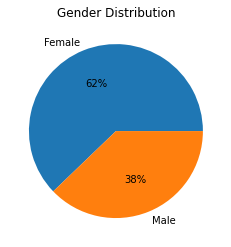

In [208]:
#Pie chart for gender distribution
l=['Female','Male']
plt.pie(a.GENDER.value_counts(),labels=l,autopct='%.0f%%')
plt.title('Gender Distribution')
plt.show()

The above plot shows that from the data, 62% records are of female gender and 38% are of male gender.

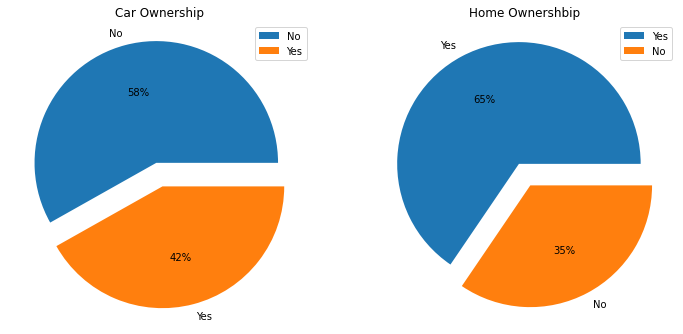

In [209]:
#Pie chart for Car Ownership and Home Ownership
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
plt.pie(a.OWN_CAR.value_counts(),explode=[0.1,0.1],autopct='%.0f%%',labels=['No','Yes'])
plt.title('Car Ownership')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.pie(a.OWN_HOME.value_counts(),explode=[0.1,0.1],autopct='%.0f%%',labels=['Yes','No'])
plt.title('Home Ownershbip')
plt.legend(loc='upper right')
plt.show()

From the above plot, we can see that 42% of the records have their own car and 58% don't own a car.
Also, 65% of the records have their own home, while 35% don't own a home.

In [210]:
a.TARGET.value_counts()

0    25066
1       68
Name: TARGET, dtype: int64

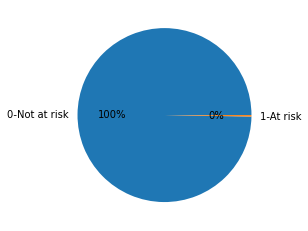

In [211]:
# pie chart for TARGET Column
l=['0-Not at risk','1-At risk']
plt.pie(a.TARGET.value_counts(),labels=l,autopct='%.0f%%')
plt.show()

Target column has very less records of users having risk for credit card.  
Records that do not have risk are 25066 while those which are at risk are 68.

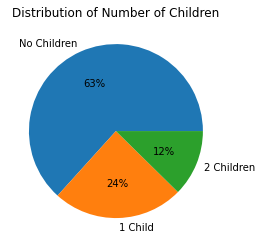

In [212]:
# Pie chart of distribution of NO_OF_CHILDREN
la=['No Children','1 Child','2 Children']
plt.pie(a.NO_OF_CHILDREN.value_counts(),labels=la,autopct='%.0f%%')
plt.title('Distribution of Number of Children')
plt.show()

From the above plot we can see that 63% of records have no children, followed by 1 child which are 24% 
and then 2 children which are 12% of the total records.

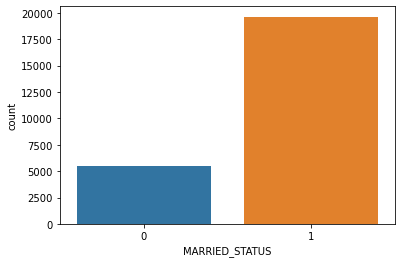

In [213]:
# Countplot for MARRIED_STATUS
sns.countplot(a.MARRIED_STATUS)
plt.show()

From the above plot we can see that the records that are married are almost triple than that of records that are not married.

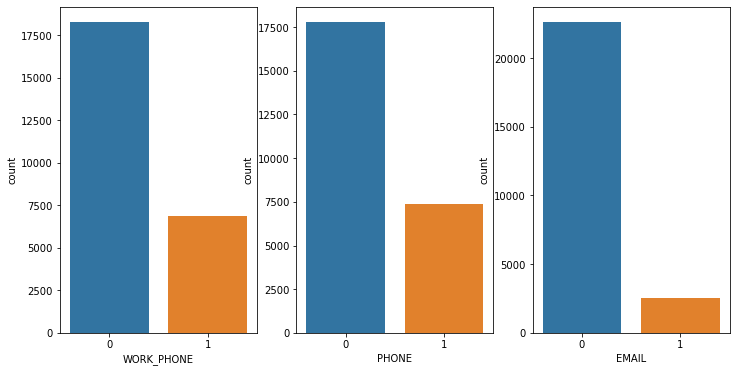

In [214]:
# Countplots for WORK_PHONE, PHONE, EMAIL
plt.figure(figsize=[12,6])
plt.subplot(1,3,1)
sns.countplot(a.WORK_PHONE)

plt.subplot(1,3,2)
sns.countplot(a.PHONE)

plt.subplot(1,3,3)
sns.countplot(a.EMAIL)

plt.show()

From the above plots, we can see that the count of records having work phone is very much higher than the count of people that do not have work phone.
Also, the records having a phone are less than that of records that have do not have a phone.  
Very less of the records have email id as seen from the third plot.

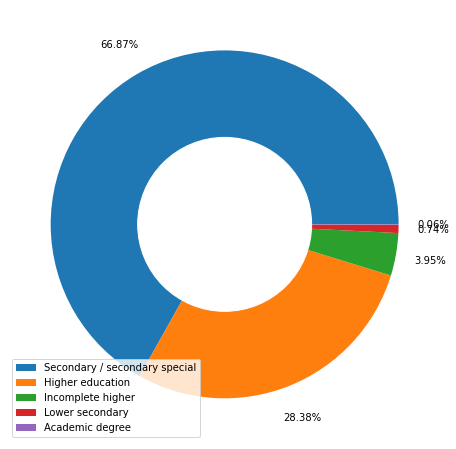

In [215]:
# Pie chart for edcucation details
plt.figure(figsize=[15,8])
plt.pie(a.EDUCATION_TYPE.value_counts(),autopct='%1.2f%%',pctdistance=1.2)
plt.legend(a.EDUCATION_TYPE.unique(), loc ="lower left")
circle = plt.Circle( (0,0), 0.5, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

From the above plot, we can see that the highest number of records that have completed their secondary/secondary special education are 66.87% , it is then followed by higher education 28.38%.  
Next is the records that have incomplete higher education 3.95%  followed by lower secondary 0.74%.  
There are very less records that have an academic degree 0.06%.

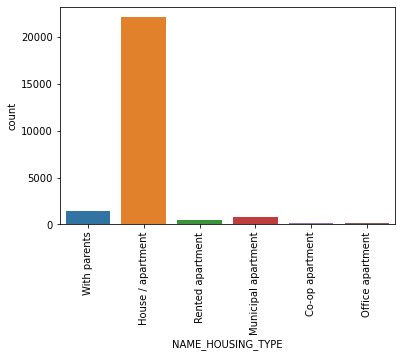

In [216]:
#countplot for type of housing 
sns.countplot(a.NAME_HOUSING_TYPE)
plt.xticks(rotation=90)
plt.show()

From the above graph, we can see that most number of records stay in a house/apartment. It is followed by records that stay with parents and municipal apartment.  
Rented apartment has less number of records and co-op apartment and office apartment have very less records.

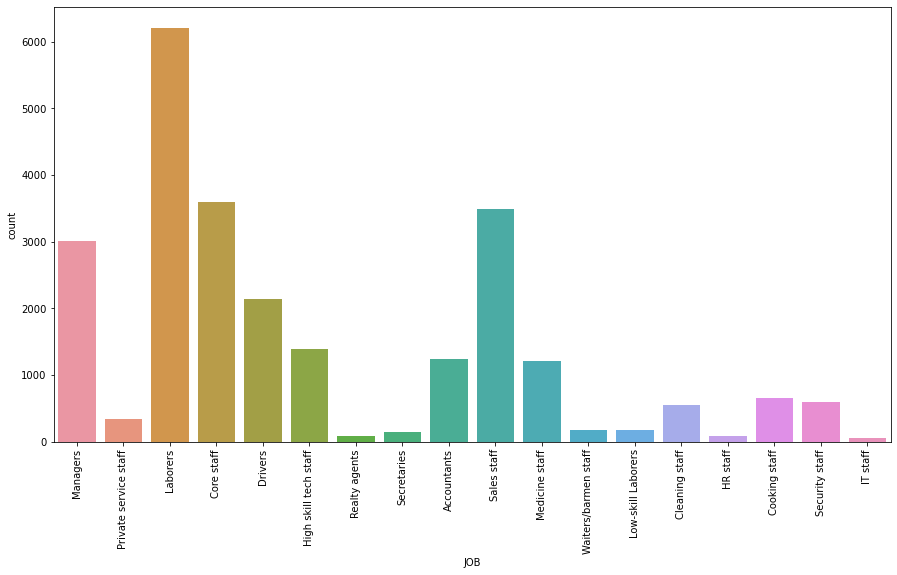

In [217]:
# distribution of types of job of the records
plt.figure(figsize=[15,8])
sns.countplot(a.JOB)
plt.xticks(rotation=90)
plt.show()

The most numbers of records work as laborers followed by core staff, sales staff and managers.  
The remaining data is distributed into various types of jobs as seen from the graph above.

### Numerical Variables

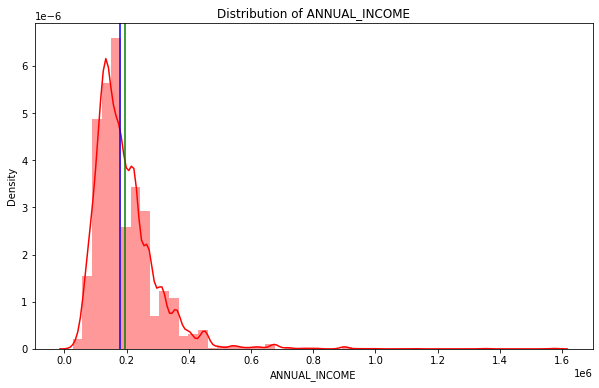

In [218]:
plt.figure(figsize=[10,6])
sns.distplot(a.ANNUAL_INCOME,color='r')
plt.title('Distribution of ANNUAL_INCOME')
plt.axvline(x=a.ANNUAL_INCOME.mean(),color='green')
plt.axvline(x=a.ANNUAL_INCOME.median(),color='blue')
plt.show()

The ANNUAL_INCOME feature is highly positively skewed as seen from the graph above.   
Also, most records are present in the left section of the graph.  
The mean and median lines are also shown in the graph.

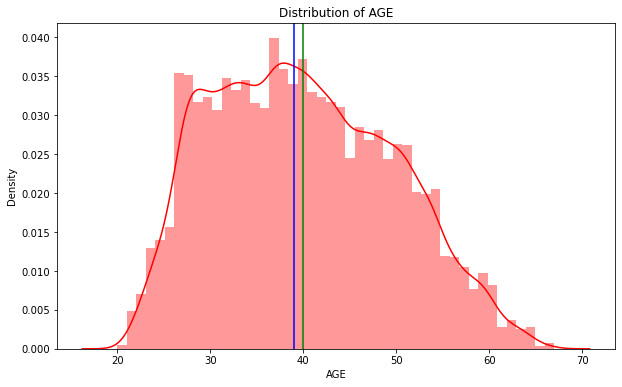

In [219]:
plt.figure(figsize=[10,6])
sns.distplot(a.AGE,color='r')
plt.axvline(x=a.AGE.mean(),color='green')
plt.axvline(x=a.AGE.median(),color='blue')
plt.title('Distribution of AGE')
plt.show()

As seen from the graph, the age feature is fairly symmetrical.   
The mean and median in the age column are also close to each other are are close to 40.

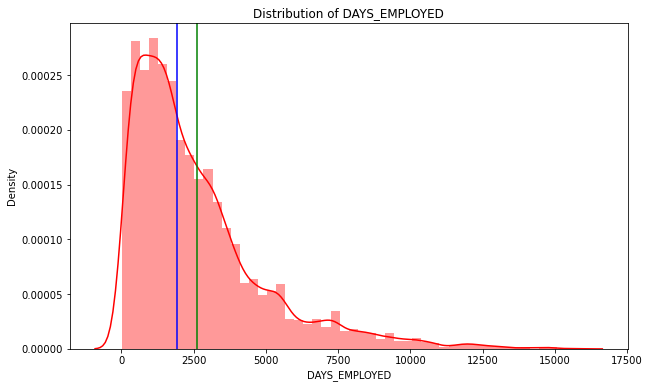

In [220]:
plt.figure(figsize=[10,6])
sns.distplot(a.DAYS_EMPLOYED,color='r')
plt.axvline(x=a.DAYS_EMPLOYED.mean(),color='green')
plt.axvline(x=a.DAYS_EMPLOYED.median(),color='blue')
plt.title('Distribution of DAYS_EMPLOYED')
plt.show()

The days employed feature is highly positively skewed as seen from the graph above.  
Most of the data lies between the range of 0-3000.  
The mean as seen from the graph is near 2500 days.

## Bivariate Analysis

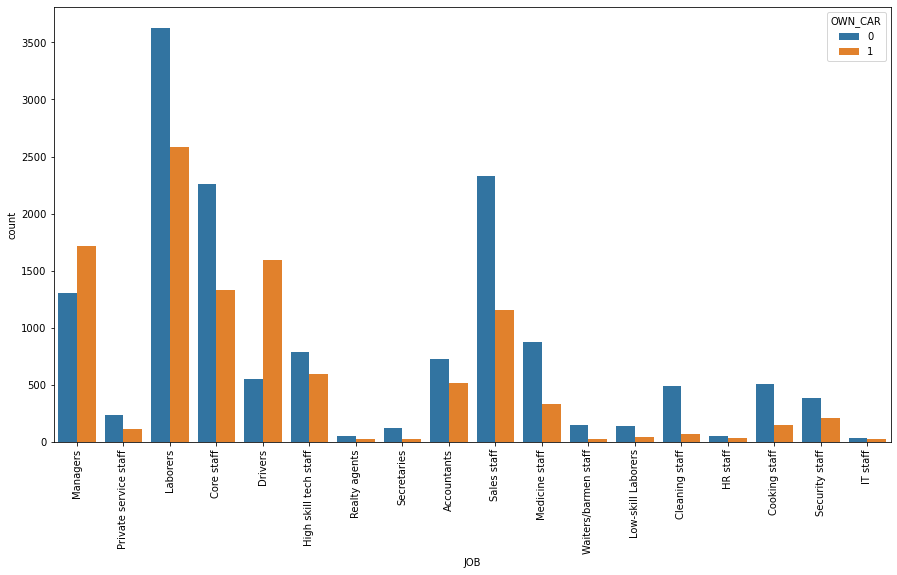

In [221]:
#countlpot for various types of job and thier distribution if they own a car or not
plt.figure(figsize=[15,8])
sns.countplot(x='JOB',hue='OWN_CAR',data=a)
plt.xticks(rotation=90)
plt.show()

We can see from the graph that almost all the features have some values with owning the car and not owning the car.  
Only in the manager job category, we can see that the records owning a car are more than people now owning the car.  
Other all job categories have recording not owning car more than the records owning car

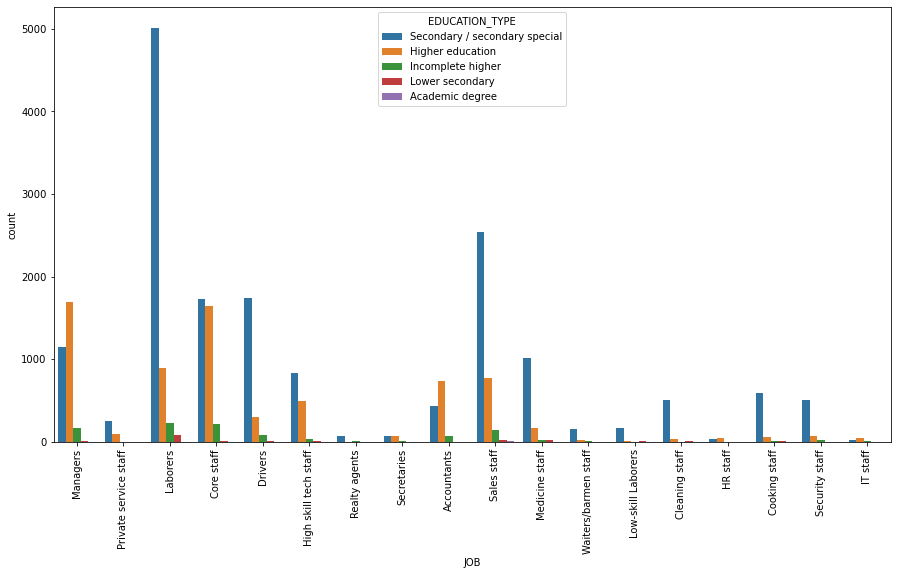

In [222]:
#countlpot for various types of job and thier distribution about their education details
plt.figure(figsize=[15,8])
sns.countplot(x='JOB',hue='EDUCATION_TYPE',data=a)
plt.xticks(rotation=90)
plt.show()

Laborers have more number of records whose education is secondary/secondary special.  
In core staff category, records having education completed till secondary/secondary special and higher education are almost similar.  
Managers have the highest number of records who have completed higher education.


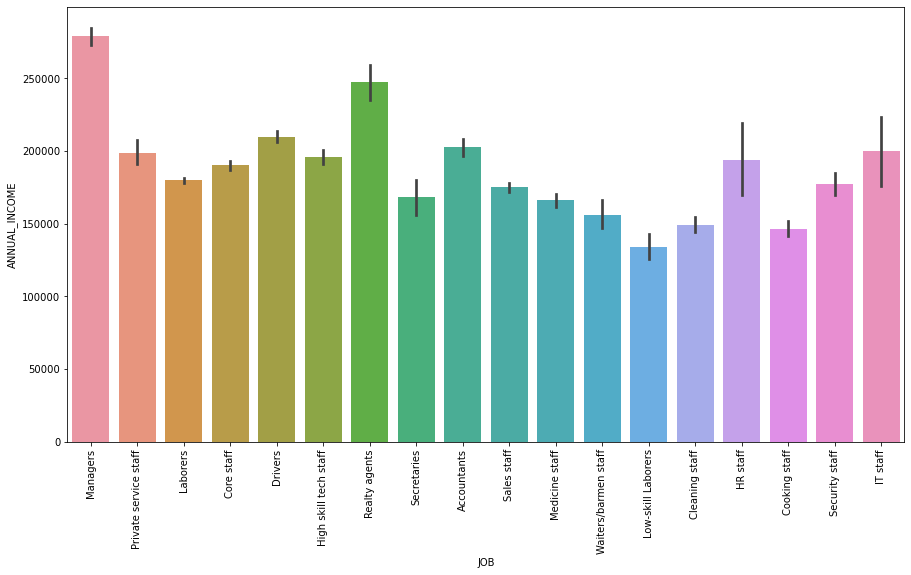

In [223]:
#Barplot of categories of job and thier annual income
plt.figure(figsize=[15,8])
sns.barplot(x=a.JOB,y=a.ANNUAL_INCOME)
plt.xticks(rotation=90)
plt.show()

Managers have the highest income among the other job categories followed by realty agents.  
Low skill workers have the lowest income among the other job categories.  
All the other job categories have similar annual income between 150000 to 200000.


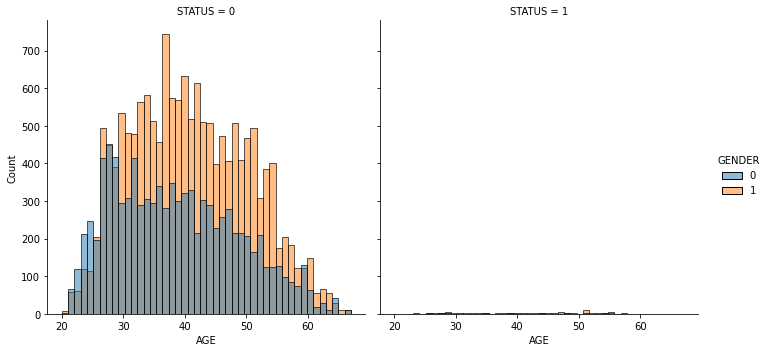

In [224]:
#Distribution plot of age vs target columns with age divided into gender categories
sns.displot(data=a,x='AGE',hue="GENDER", col='STATUS')
plt.show()

We can see from graph that the data is almost mormally distributed in the target 0 column i.e the records show no risk.  
The distribution of males and females in the graph is also shown with different colors.  
The users that are at risk i.e. target 1 arevery very less compared to the not at risk records, it also can be seen from the right side of the graph, it has minimal values.

<AxesSubplot:xlabel='EDUCATION_TYPE'>

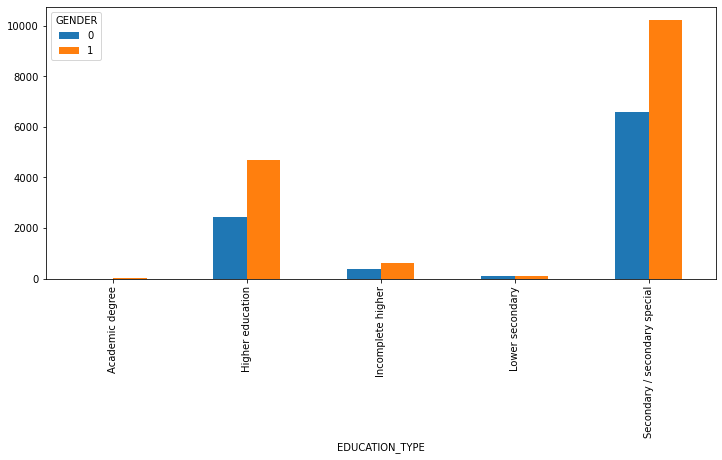

In [225]:
#barchart of records splitted into education categories and the number of children 
#the education category is divided into gender category
abc= a.pivot_table(index='EDUCATION_TYPE', columns='GENDER', values=['NO_OF_CHILDREN'], aggfunc='size')
abc.plot(kind='bar', figsize=(12, 5))

We can see from the graph that records who have completed secondary/secondary special have the most number of children and in that females have more children than males.  
Higher education category follows with the second most number of children and it also shows that females have more children than males.  
The other remaining education categories which are academic degree, lower secondary and incomplete higher have less number of children compared to the first two categories.

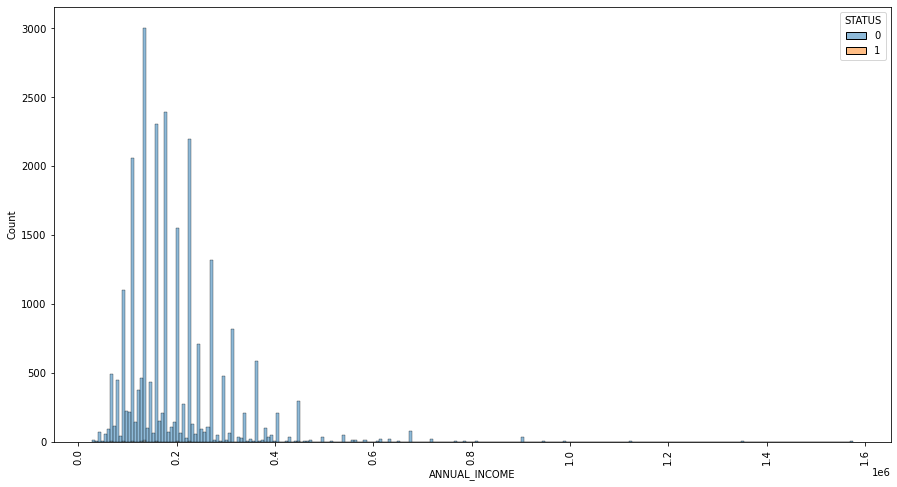

In [226]:
# histogram of annual income with hue in status column, i.e user with good and bad past dues
plt.figure(figsize=[15,8])
sns.histplot(x='ANNUAL_INCOME',hue='STATUS',data=a)
plt.xticks(rotation=90)
plt.show()

We can see from the above graph that the records that have good status are have positively skewed data.  
The records that have bad status are very low compared to the records that have good status.  
The data can be seen fairly right skewed.

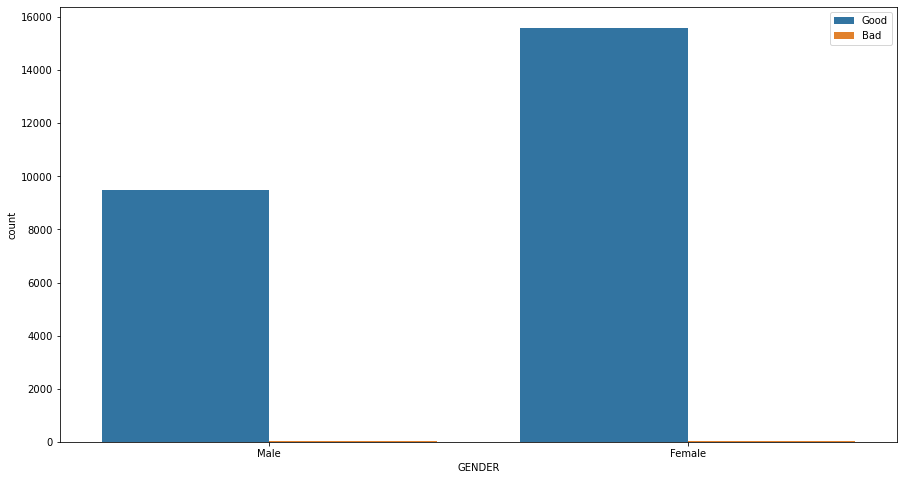

In [227]:
# countplot of Status and Gender, gender is again divided in separate categories
plt.figure(figsize=[15,8])
sns.countplot(x='GENDER',hue='STATUS',data=a)
plt.legend(labels = ["Good", "Bad"])
plt.xticks(np.linspace(0, 1, 2),['Male','Female'])
plt.show()

Females that have good status are more than the males that have good status.  
Both the genders have very less records that have bad status.

# Outlier Analysis

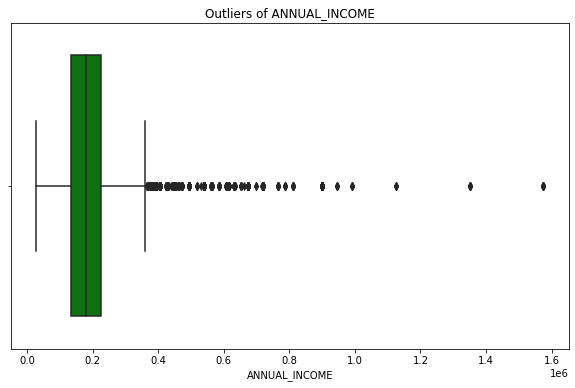

In [228]:
#Boxplot of ANNUAL_INCOME
plt.figure(figsize=[10,6])
sns.boxplot(a.ANNUAL_INCOME,color='g')
plt.title('Outliers of ANNUAL_INCOME')
plt.show()

Annual Income feature has some outliers present in the data.  
The data is right skewed.

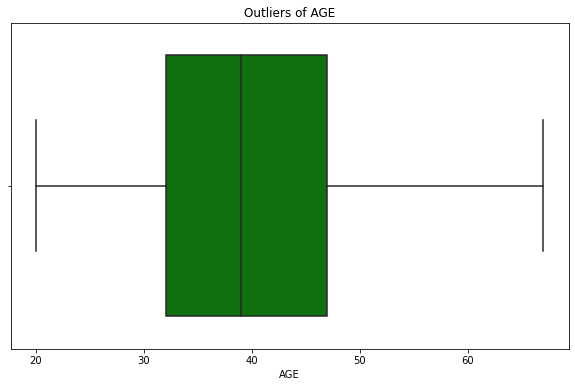

In [229]:
#Boxplot of AGE
plt.figure(figsize=[10,6])
sns.boxplot(a.AGE,color='g')
plt.title('Outliers of AGE')
plt.show()

Age column has no outliers in the data.  
Age is normally distributed.

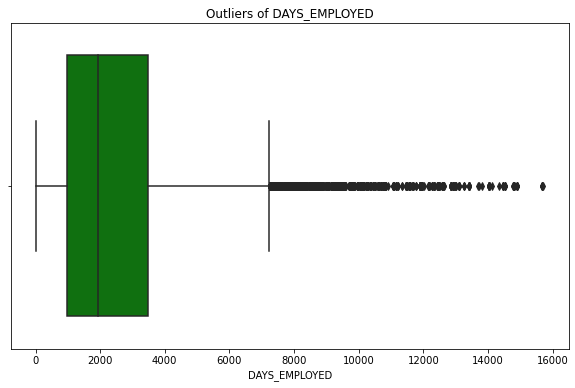

In [230]:
#Boxplot of DAYS_EMPLOYED
plt.figure(figsize=[10,6])
sns.boxplot(a.DAYS_EMPLOYED,color='g')
plt.title('Outliers of DAYS_EMPLOYED')
plt.show()

Days employed column also has outliers in the data as seen from the graph.  
Days employed column is also righly skewed.

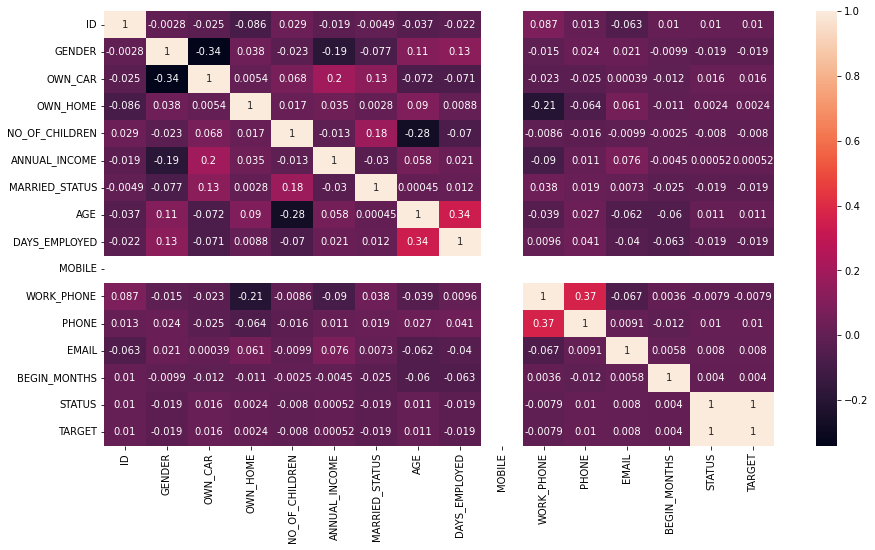

In [231]:
# Heatmap of the dataset
corr=a.corr()
plt.figure(figsize=[15,8])
sns.heatmap(corr,annot=True)
plt.show()

The correlation between the features is seen from the above heatmap.  
The features DAYS_EMPLOYED and AGE have high correlation.  
The features OWN_CAR and GENDER have low correlation.

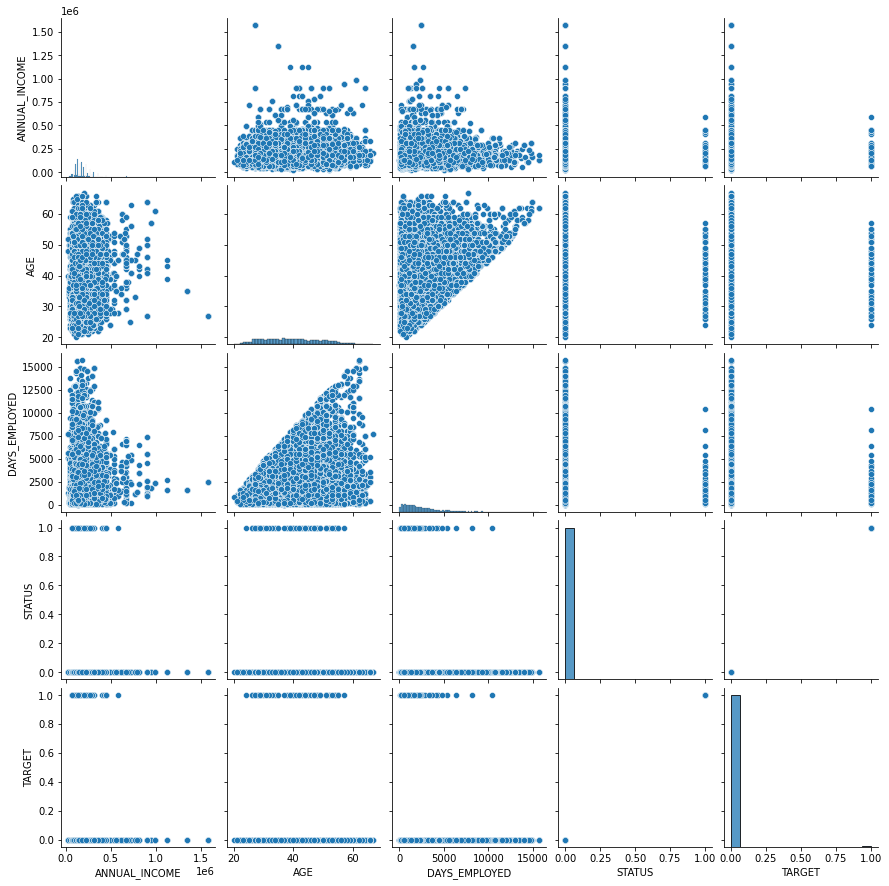

In [232]:
# Pairplot of the numerical features
pp=a[['ANNUAL_INCOME','AGE','DAYS_EMPLOYED','STATUS','TARGET']].copy()
sns.pairplot(pp)
plt.show()

Pairplot of the numerical features in the dataset is shown in the above graph.  
It can be seen from the pairplot as well that the columns AGE and DAYS_EMPLOYED have high correlation. 

# Encoding the Categorical Variables

In [233]:
a.NAME_HOUSING_TYPE.value_counts()

House / apartment      22102
With parents            1430
Municipal apartment      812
Rented apartment         439
Office apartment         199
Co-op apartment          152
Name: NAME_HOUSING_TYPE, dtype: int64

In [234]:
# replacing the categories in NAME_HOUSING_TYPE to numerical values based on thier type of housing level from lowest to highest
a['NAME_HOUSING_TYPE'].replace('Office apartment',0,inplace=True)
a['NAME_HOUSING_TYPE'].replace('Co-op apartment',0,inplace=True)
a['NAME_HOUSING_TYPE'].replace('Municipal apartment',1,inplace=True)
a['NAME_HOUSING_TYPE'].replace('With parents',1,inplace=True)
a['NAME_HOUSING_TYPE'].replace('Rented apartment',2,inplace=True)
a['NAME_HOUSING_TYPE'].replace('House / apartment',3,inplace=True)

In [235]:
a.EDUCATION_TYPE.value_counts()

Secondary / secondary special    16808
Higher education                  7132
Incomplete higher                  993
Lower secondary                    187
Academic degree                     14
Name: EDUCATION_TYPE, dtype: int64

In [236]:
# replacing the categories in EDUCATION_TYPE to numerical values based on thier education level from lowest to highest
a['EDUCATION_TYPE'].replace('Lower secondary',0,inplace=True)
a['EDUCATION_TYPE'].replace('Secondary / secondary special',1,inplace=True)
a['EDUCATION_TYPE'].replace('Incomplete higher',2,inplace=True)
a['EDUCATION_TYPE'].replace('Higher education',3,inplace=True)
a['EDUCATION_TYPE'].replace('Academic degree',4,inplace=True)

# Outlier Treatment

## Outlier Treatment of Annual_Income 

In [237]:
print('before handling outliers:',a.ANNUAL_INCOME.mean())
q3=a.ANNUAL_INCOME.quantile(0.75)
q1=a.ANNUAL_INCOME.quantile(0.25)
iqr = q3 - q1

a_updated = a[~((a['ANNUAL_INCOME']<(q1-1.5*iqr)) | (a['ANNUAL_INCOME']>(q3+1.5*iqr)))]
print('after handling outliers:',a_updated.ANNUAL_INCOME.mean())

before handling outliers: 194833.85091907377
after handling outliers: 179554.85359438925


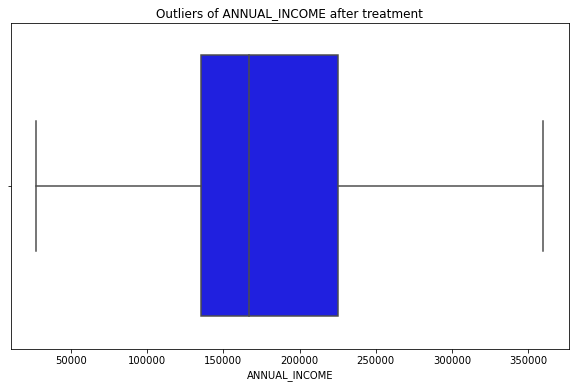

In [238]:
plt.figure(figsize=[10,6])
sns.boxplot(a_updated.ANNUAL_INCOME,color='b')
plt.title('Outliers of ANNUAL_INCOME after treatment')
plt.show()

## Outlier Treatment of Days_Employed

In [239]:
print('before handling outliers:',a.DAYS_EMPLOYED.mean())
q3=a.DAYS_EMPLOYED.quantile(0.75)
q1=a.DAYS_EMPLOYED.quantile(0.25)
iqr = q3 - q1

a_updated = a[~((a['DAYS_EMPLOYED']<(q1-1.5*iqr)) | (a['DAYS_EMPLOYED']>(q3+1.5*iqr)))]
print('after handling outliers:',a_updated.DAYS_EMPLOYED.mean())

before handling outliers: 2624.940876899817
after handling outliers: 2207.6183186738836


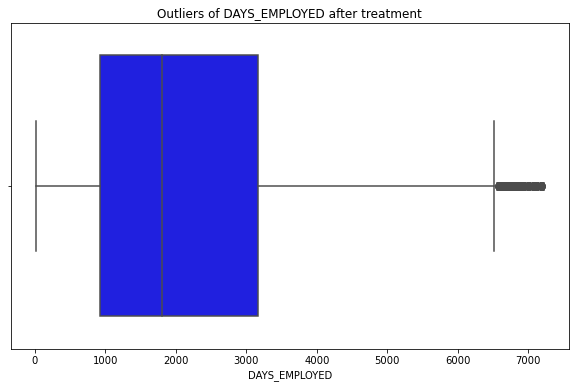

In [240]:
plt.figure(figsize=[10,6])
sns.boxplot(a_updated.DAYS_EMPLOYED,color='b')
plt.title('Outliers of DAYS_EMPLOYED after treatment')
plt.show()

# Scale the Data

In [241]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [242]:
#using standardscaler to scale the data from the ANNUAL_INCOME, AGE, DAYS_EMPLOYED and BEGIN_MONTHS columns since they have a large scale
a_updated[['ANNUAL_INCOME','AGE','DAYS_EMPLOYED']]=ss.fit_transform(a_updated[['ANNUAL_INCOME','AGE','DAYS_EMPLOYED']])

In [243]:
#displaying the data to see the results of scaling 
a_updated.head(20)

,ID,GENDER,OWN_CAR,OWN_HOME,NO_OF_CHILDREN,ANNUAL_INCOME,EDUCATION_TYPE,MARRIED_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,PHONE,EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,1,1,0,2,0.706495,1,1,1,-0.361925,0.056642,1,0,0,0,Managers,-6,0,0
1,5142753,1,0,0,0,-1.082420,1,0,3,0.913605,-1.122412,1,1,1,0,Private service staff,-4,0,0
2,5111146,0,1,1,0,0.706495,3,1,3,1.445076,-0.723263,1,0,1,0,Laborers,0,0,0
3,5010310,1,1,1,1,-0.784267,1,1,3,0.169546,-0.154275,1,0,0,0,Core staff,-3,0,0
4,5010835,0,1,1,2,-0.528708,1,1,3,0.807311,2.066492,1,1,0,0,Drivers,-29,0,0
5,5067057,1,1,1,0,-0.486115,1,1,3,0.275840,0.460697,1,0,1,0,Core staff,-25,0,0
6,5095635,0,1,0,1,-0.145369,3,1,3,-0.999691,-1.219287,1,0,0,0,Drivers,-19,0,0
7,5096402,0,1,0,0,1.984291,3,1,3,1.232488,0.608462,1,1,1,0,High skill tech staff,-18,0,0
9,5026464,1,0,1,1,0.706495,1,1,3,0.594723,0.315384,1,1,1,0,Realty agents,-38,0,0
10,5026032,0,1,1,0,-0.912047,1,1,2,-1.318573,-0.414857,1,0,0,0,Managers,-15,0,0


In [244]:
a_updated.columns

Index(['ID', 'GENDER', 'OWN_CAR', 'OWN_HOME', 'NO_OF_CHILDREN',
       'ANNUAL_INCOME', 'EDUCATION_TYPE', 'MARRIED_STATUS',
       'NAME_HOUSING_TYPE', 'AGE', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'PHONE', 'EMAIL', 'JOB', 'BEGIN_MONTHS', 'STATUS', 'TARGET'],
      dtype='object')

# Remove Insignificant Variables

In [245]:
# The column 'ID','GENDER','MARRIED_STATUS' ,'MOBILE', 'WORK_PHONE','PHONE', 'EMAIL', 'JOB', 'BEGIN_MONTHS' since the mentioned columns are not significant
# Thus, we drop the column.

In [246]:
a_updated=a_updated.drop(['ID','GENDER','MARRIED_STATUS','MOBILE', 'WORK_PHONE','PHONE', 'EMAIL', 'JOB', 'BEGIN_MONTHS'],axis=1)
a_updated.head()

,OWN_CAR,OWN_HOME,NO_OF_CHILDREN,ANNUAL_INCOME,EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,STATUS,TARGET
0,1,0,2,0.706495,1,1,-0.361925,0.056642,0,0
1,0,0,0,-1.082420,1,3,0.913605,-1.122412,0,0
2,1,1,0,0.706495,3,3,1.445076,-0.723263,0,0
3,1,1,1,-0.784267,1,3,0.169546,-0.154275,0,0
4,1,1,2,-0.528708,1,3,0.807311,2.066492,0,0


# Split Dependent and Independent Variables

In [295]:
X = a_updated.drop('TARGET',axis=1)

y = a_updated['TARGET']

# Train-Test Split

In [296]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2, stratify=y)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (18918, 9)
y_train (18918,)
X_test (4730, 9)
y_test (4730,)


# Models

## Logistic Regression Model

In [297]:
# Importing the required libraries for LogisticRegression and
# Appling LogisticRegression Model on the dataset

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [298]:
#Results of running the model on training dataset
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18865
           1       1.00      1.00      1.00        53

    accuracy                           1.00     18918
   macro avg       1.00      1.00      1.00     18918
weighted avg       1.00      1.00      1.00     18918



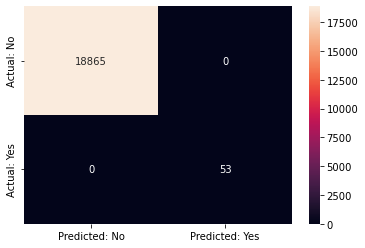

In [299]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_train,y_pred_train)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

In [300]:
#Results of running the model on test dataset
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4717
           1       1.00      1.00      1.00        13

    accuracy                           1.00      4730
   macro avg       1.00      1.00      1.00      4730
weighted avg       1.00      1.00      1.00      4730



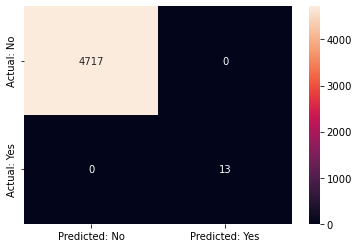

In [301]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

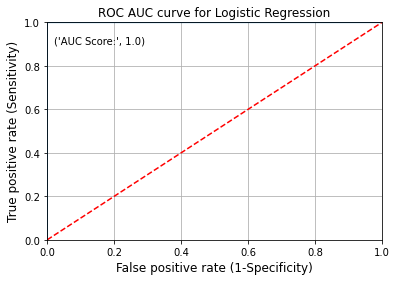

In [302]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for Logistic Regression', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,
y_pred_proba),4)))
plt.grid(True)

In [303]:
# Since the data is highly imbalanced, it shows that the model is 100% accurate which is not true.
# Hence, using SMOTE for balancing the target data

#### Define a function to evaluate Models

In [304]:
# create an empty dataframe to store the scores for various algorithms
report_card_train = pd.DataFrame(columns=['Model Name', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def Performance_report_train(model, Model_name):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred= model.predict(X_train)
    y_pred_proba = model.predict_proba(X_train)
    y_pred_proba = y_pred_proba[:, 1]
    # assign 'score_card' as global variable
    global report_card_train

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    report_card_train = report_card_train.append({'Model Name': Model_name,
                                    'AUC Score' : metrics.roc_auc_score(y_train, y_pred_proba),
                                    'Precision Score': metrics.precision_score(y_train, y_pred),
                                    'Recall Score': metrics.recall_score(y_train, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_train, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_train, y_pred),
                                    'f1-score': metrics.f1_score(y_train, y_pred)}, 
                                    ignore_index = True)

In [305]:
# create an empty dataframe to store the scores for various algorithms
report_card = pd.DataFrame(columns=['Model Name', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def Performance_report(model, Model_name):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred= model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba = y_pred_proba[:, 1]
    # assign 'score_card' as global variable
    global report_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    report_card = report_card.append({'Model Name': Model_name,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred_proba),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [306]:
Performance_report(model, 'Basic Logistic Regression Model')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.0,1.0,1.0,1.0,1.0,1.0


In [307]:
Performance_report_train(model, 'Basic Logistic Regression Model')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.0,1.0,1.0,1.0,1.0,1.0


## Using SMOTE for UpSampling

In [308]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [309]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [310]:
y_train_smote.value_counts()

0    18865
1    18865
Name: TARGET, dtype: int64

In [311]:
new_model = LogisticRegression()

new_model.fit(X_train_smote, y_train_smote)

y_pred_train = new_model.predict(X_train_smote)
y_pred_test = new_model.predict(X_test)

In [312]:
from sklearn.metrics import classification_report
print(classification_report(y_train_smote, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18865
           1       1.00      1.00      1.00     18865

    accuracy                           1.00     37730
   macro avg       1.00      1.00      1.00     37730
weighted avg       1.00      1.00      1.00     37730



In [313]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4717
           1       1.00      1.00      1.00        13

    accuracy                           1.00      4730
   macro avg       1.00      1.00      1.00      4730
weighted avg       1.00      1.00      1.00      4730



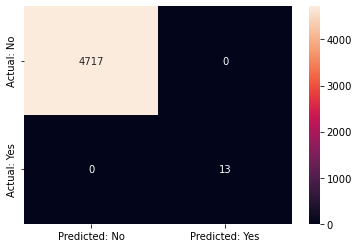

In [314]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

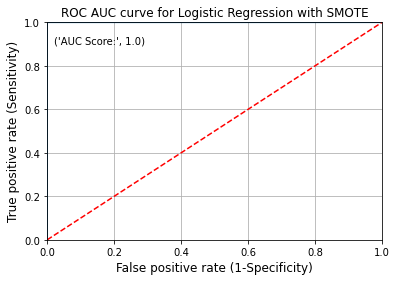

In [315]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = new_model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for Logistic Regression with SMOTE', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,
y_pred_proba),4)))
plt.grid(True)

In [316]:
# The model still shows 100% accuracy and is still overfitting, 
# this is happening because of the feature 'STATUS' because it is causing multicollinearity with the target variable
# dropping the column 'STATUS' for getting results that do not have multicollinearity

In [317]:
Performance_report(new_model, 'Logistic Regression Model with SMOTE')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.0,1.0,1.0,1.0,1.0,1.0
1,Logistic Regression Model with SMOTE,1.0,1.0,1.0,1.0,1.0,1.0


In [320]:
def Performance_report_train(model, Model_name):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred= model.predict(X_train_smote)
    y_pred_proba = model.predict_proba(X_train_smote)
    y_pred_proba = y_pred_proba[:, 1]
    # assign 'score_card' as global variable
    global report_card_train
    report_card_train = report_card_train.append({'Model Name': Model_name,
                                    'AUC Score' : metrics.roc_auc_score(y_train_smote, y_pred_proba),
                                    'Precision Score': metrics.precision_score(y_train_smote, y_pred),
                                    'Recall Score': metrics.recall_score(y_train_smote, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_train_smote, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_train_smote, y_pred),
                                    'f1-score': metrics.f1_score(y_train_smote, y_pred)}, 
                                    ignore_index = True)

In [321]:
Performance_report_train(new_model, 'Logistic Regression Model with SMOTE')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.0,1.0,1.0,1.0,1.0,1.0
1,Logistic Regression Model with SMOTE,1.0,1.0,1.0,1.0,1.0,1.0


## Using Logistic Regression Again to get better results

In [322]:
X_train_smote = X_train_smote.drop('STATUS',axis=1)
X_test = X_test.drop('STATUS',axis=1)

In [323]:
X_train_smote.shape,X_test.shape

((37730, 8), (4730, 8))

In [324]:
new_model_nomc = LogisticRegression()

new_model_nomc.fit(X_train_smote, y_train_smote)

y_pred_train = new_model_nomc.predict(X_train_smote)
y_pred_test = new_model_nomc.predict(X_test)

In [325]:
from sklearn.metrics import classification_report
print(classification_report(y_train_smote, y_pred_train))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66     18865
           1       0.66      0.72      0.69     18865

    accuracy                           0.68     37730
   macro avg       0.68      0.68      0.68     37730
weighted avg       0.68      0.68      0.68     37730



In [326]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      4717
           1       0.00      0.46      0.01        13

    accuracy                           0.63      4730
   macro avg       0.50      0.55      0.39      4730
weighted avg       0.99      0.63      0.77      4730



In [327]:
# the training data shows that the model has 68% accuracy 
# and the test data shows that the model has 63% accuracy
# this results are acceptable for us for now

In [328]:
# Now we can observe that the model is not overfitting and we can continue to use this data for our further process 
# We will be running various other machine learning models on our data to get good overall results 

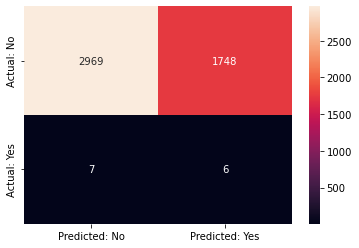

In [329]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

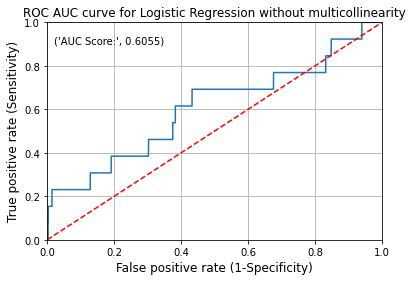

In [330]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = new_model_nomc.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for Logistic Regression without multicollinearity', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,
y_pred_proba),4)))
plt.grid(True)

In [331]:
Performance_report(new_model_nomc, 'Logistic Regression Model without correlated column')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791


In [332]:
Performance_report_train(new_model_nomc, 'Logistic Regression Model without correlated column')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965


## Decision Tree Model

In [333]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=10)

In [334]:
dtc.fit(X_train_smote, y_train_smote)

y_pred_train = dtc.predict(X_train_smote)
y_pred_test = dtc.predict(X_test)

In [335]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4717
           1       0.07      0.15      0.09        13

    accuracy                           0.99      4730
   macro avg       0.53      0.57      0.54      4730
weighted avg       1.00      0.99      0.99      4730



In [336]:
# From the above cell we can observe that the Decision Tree Classifer gives us an accuracy of 99% 
# we can conclude that this model is overfitting on the data and will be tuned using hyper parameters

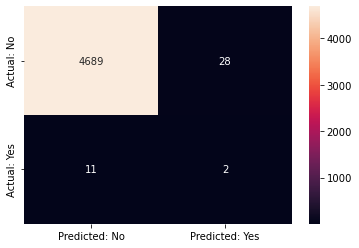

In [337]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

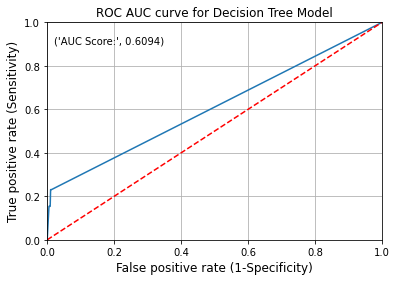

In [338]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtc.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for Decision Tree Model', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,y_pred_proba),4)))
plt.grid(True)

In [339]:
Performance_report(dtc, 'Decision Tree Classifier')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023


In [340]:
Performance_report_train(dtc, 'Decision Tree Classifier')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622


### Hyper Parameter Tuning for Decision Tree Model (Using GridSearchCV)

In [341]:
# the cells below were ran in colab and their results are stored since they require a lot of computing power and time

In [342]:
# Running Decision Tree Classifier with Best Parameters Found from GridSearchCV
dt_tuned = DecisionTreeClassifier(criterion = 'gini', max_depth = 9, min_samples_split = 9, random_state=10)
dt_tuned_model = dt_tuned.fit(X_train_smote, y_train_smote)
y_pred_train = dt_tuned_model.predict(X_train_smote)
y_pred_test = dt_tuned_model.predict(X_test)

In [343]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81      4717
           1       0.00      0.31      0.01        13

    accuracy                           0.68      4730
   macro avg       0.50      0.49      0.41      4730
weighted avg       0.99      0.68      0.81      4730



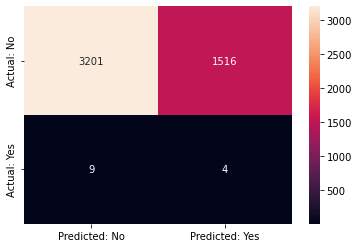

In [344]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

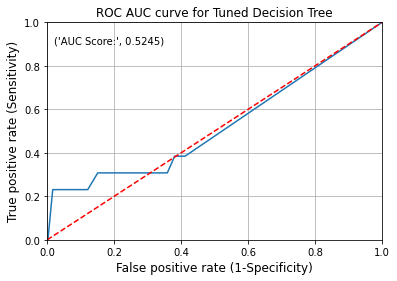

In [345]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dt_tuned_model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for Tuned Decision Tree', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,y_pred_proba),4)))
plt.grid(True)

In [346]:
Performance_report(dt_tuned_model, 'Tuned Decision Tree Classifier')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219


In [347]:
Performance_report_train(dt_tuned_model, 'Tuned Decision Tree Classifier')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685


## Random Forest Classifier

In [348]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train_smote, y_train_smote)

y_pred_train = rfc.predict(X_train_smote)
y_pred_test = rfc.predict(X_test)

In [349]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4717
           1       0.12      0.15      0.13        13

    accuracy                           0.99      4730
   macro avg       0.56      0.58      0.57      4730
weighted avg       1.00      0.99      0.99      4730



In [350]:
# we can observe that the randomforestclassifer is giving accuracy of 99% on the data
# the model is overfitting with random forest classifier

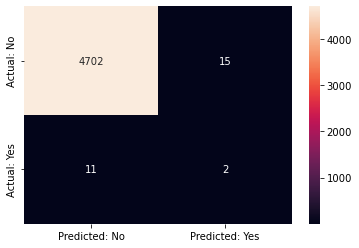

In [351]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

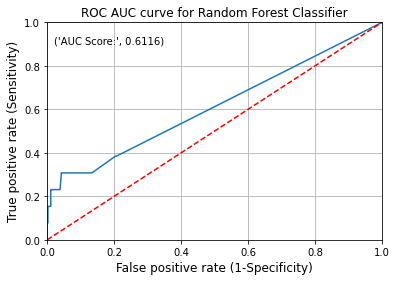

In [352]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for Random Forest Classifier', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,y_pred_proba),4)))
plt.grid(True)

In [353]:
Performance_report(rfc, 'Random Forest Classifier')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219
5,Random Forest Classifier,0.611634,0.117647,0.153846,0.994503,0.130625,0.133333


In [354]:
Performance_report_train(rfc, 'Random Forest Classifier')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685
5,Random Forest Classifier,0.999939,0.998569,0.998675,0.998622,0.997244,0.998622


### Hyper parameter Tuning for Random Forest (using GridSearchCV)

In [355]:
# the cells below were ran in colab and their results are stored since they require a lot of computing power and time

In [356]:
rf_tuned = RandomForestClassifier(criterion = 'gini', max_depth = 20, min_samples_split = 2, 
                                  n_estimators = 150, random_state=10)
rf_tuned.fit(X_train_smote, y_train_smote)

y_pred_train = rf_tuned.predict(X_train_smote)
y_pred_test = rf_tuned.predict(X_test)

In [357]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4717
           1       0.12      0.15      0.14        13

    accuracy                           0.99      4730
   macro avg       0.56      0.58      0.57      4730
weighted avg       1.00      0.99      0.99      4730



In [358]:
# the random forest classifier with tuned hyperparameters is also giving accuracy of 99%
# this model is also overfitting after tuning hyperparameters

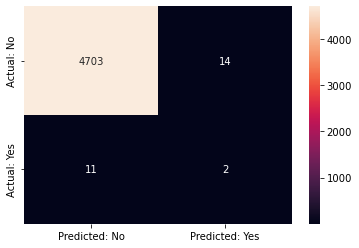

In [359]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

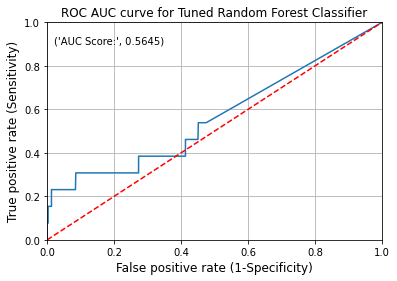

In [360]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rf_tuned.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for Tuned Random Forest Classifier', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,y_pred_proba),4)))
plt.grid(True)

In [361]:
Performance_report(rf_tuned, 'Tuned Random Forest Classifier')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219
5,Random Forest Classifier,0.611634,0.117647,0.153846,0.994503,0.130625,0.133333
6,Tuned Random Forest Classifier,0.564480,0.125000,0.153846,0.994715,0.135309,0.137931


In [362]:
Performance_report_train(rf_tuned, 'Tuned Random Forest Classifier')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685
5,Random Forest Classifier,0.999939,0.998569,0.998675,0.998622,0.997244,0.998622
6,Tuned Random Forest Classifier,0.999846,0.998040,0.998781,0.998410,0.996820,0.998410


## KNN Model

In [363]:
from sklearn.neighbors import KNeighborsClassifier
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train_smote, y_train_smote)

y_pred_train = knn_model.predict(X_train_smote)
y_pred_test = knn_model.predict(X_test)

In [364]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4717
           1       0.01      0.08      0.02        13

    accuracy                           0.98      4730
   macro avg       0.50      0.53      0.50      4730
weighted avg       0.99      0.98      0.99      4730



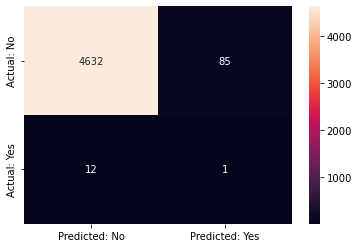

In [365]:
# Plotting the confusion matrix for KNeighborsClassifier
cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

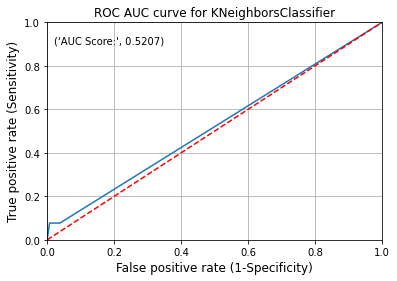

In [366]:
# ROC AUC Curve
y_pred_proba = knn_model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for KNeighborsClassifier', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,
y_pred_proba),4)))
plt.grid(True)

In [367]:
# The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away
# from that line as possible (toward the top-left corner).
# From the above plot, we can see that our classifier (knn_model with n_neighbors = 3) close to the dotted line; with the AUC
# score 0.5585.

In [368]:
Performance_report(knn_model, 'Basic KNeighborsClassifier')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219
5,Random Forest Classifier,0.611634,0.117647,0.153846,0.994503,0.130625,0.133333
6,Tuned Random Forest Classifier,0.564480,0.125000,0.153846,0.994715,0.135309,0.137931
7,Basic KNeighborsClassifier,0.520678,0.011628,0.076923,0.979493,0.015501,0.020202


In [369]:
Performance_report_train(knn_model, 'Basic KNeighborsClassifier')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685
5,Random Forest Classifier,0.999939,0.998569,0.998675,0.998622,0.997244,0.998622
6,Tuned Random Forest Classifier,0.999846,0.998040,0.998781,0.998410,0.996820,0.998410
7,Basic KNeighborsClassifier,0.995784,0.993041,0.983355,0.988232,0.976464,0.988175


### Hyper parameter tuning for KNeighborsClassifier (Using GridSearchCV)

In [370]:
# the cells below were ran in colab and their results are stored since they require a lot of computing power and time

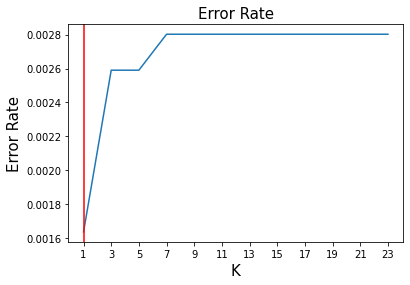

In [371]:
from sklearn.model_selection import cross_val_score
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'euclidean')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)


plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 1, color = 'red')

# display the plot
plt.show()

In [372]:
# We can see that the optimal value of K (=1 ) obtained from the GridSearchCV() results in a lowest error rate.

In [373]:
knn_classification = KNeighborsClassifier(n_neighbors = 1, metric='euclidean')
knn_tuned = knn_classification.fit(X_train_smote, y_train_smote)

y_pred_train = knn_tuned.predict(X_train_smote)
y_pred_test = knn_tuned.predict(X_test)

In [374]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4717
           1       0.02      0.08      0.03        13

    accuracy                           0.99      4730
   macro avg       0.51      0.53      0.51      4730
weighted avg       0.99      0.99      0.99      4730



In [375]:
# after applying the hyperparameter tuning and getting the best metric as euclidean and n_neighbors as 1
# we are getting the accuracy of 99%, it can be said that the model is overfitting 

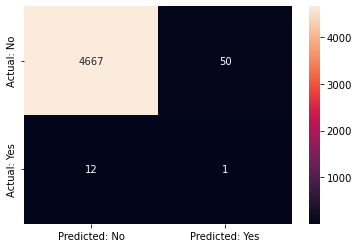

In [376]:
# Plotting the confusion matrix for Tuned KNeighborsClassifier
cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

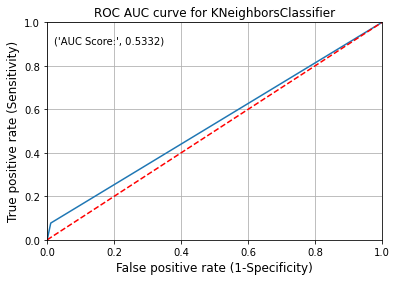

In [377]:
# ROC AUC Curve
y_pred_proba = knn_tuned.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for KNeighborsClassifier', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,
y_pred_proba),4)))
plt.grid(True)

In [378]:
Performance_report(knn_tuned, 'Tuned KNeighborsClassifier')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219
5,Random Forest Classifier,0.611634,0.117647,0.153846,0.994503,0.130625,0.133333
6,Tuned Random Forest Classifier,0.564480,0.125000,0.153846,0.994715,0.135309,0.137931
7,Basic KNeighborsClassifier,0.520678,0.011628,0.076923,0.979493,0.015501,0.020202
8,Tuned KNeighborsClassifier,0.533162,0.019608,0.076923,0.986892,0.026988,0.031250


In [379]:
Performance_report_train(knn_tuned, 'Tuned KNeighborsClassifier')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685
5,Random Forest Classifier,0.999939,0.998569,0.998675,0.998622,0.997244,0.998622
6,Tuned Random Forest Classifier,0.999846,0.998040,0.998781,0.998410,0.996820,0.998410
7,Basic KNeighborsClassifier,0.995784,0.993041,0.983355,0.988232,0.976464,0.988175
8,Tuned KNeighborsClassifier,0.986456,0.997291,0.975563,0.986456,0.972913,0.986307


## Naive Bayes Algorithm

In [380]:
from sklearn.naive_bayes import GaussianNB

In [381]:
gnb = GaussianNB()

gnb_model = gnb.fit(X_train_smote,y_train_smote)

y_pred_train = gnb_model.predict(X_train_smote)
y_pred_test = gnb_model.predict(X_test)

In [382]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70      4717
           1       0.00      0.62      0.01        13

    accuracy                           0.55      4730
   macro avg       0.50      0.58      0.36      4730
weighted avg       1.00      0.55      0.70      4730



In [383]:
# We can see that the model is giving accuracy of 54%
# it can be said that the model is not performing well on the data and is only predicting close to 50% values correctly

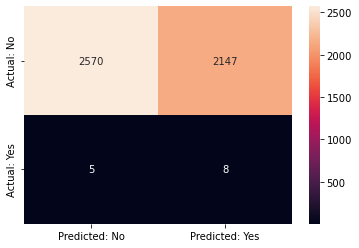

In [384]:
cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

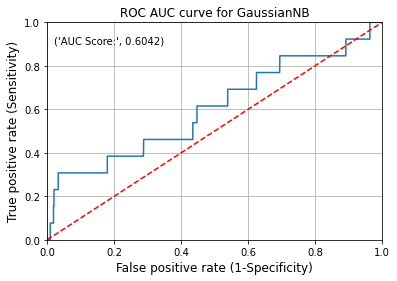

In [385]:
y_pred_proba = gnb_model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for GaussianNB', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,
y_pred_proba),4)))
plt.grid(True)

In [386]:
Performance_report(gnb_model, 'GaussianNB')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219
5,Random Forest Classifier,0.611634,0.117647,0.153846,0.994503,0.130625,0.133333
6,Tuned Random Forest Classifier,0.564480,0.125000,0.153846,0.994715,0.135309,0.137931
7,Basic KNeighborsClassifier,0.520678,0.011628,0.076923,0.979493,0.015501,0.020202
8,Tuned KNeighborsClassifier,0.533162,0.019608,0.076923,0.986892,0.026988,0.031250
9,GaussianNB,0.604222,0.003712,0.615385,0.545032,0.001927,0.007380


In [387]:
Performance_report_train(gnb_model, 'GaussianNB')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685
5,Random Forest Classifier,0.999939,0.998569,0.998675,0.998622,0.997244,0.998622
6,Tuned Random Forest Classifier,0.999846,0.998040,0.998781,0.998410,0.996820,0.998410
7,Basic KNeighborsClassifier,0.995784,0.993041,0.983355,0.988232,0.976464,0.988175
8,Tuned KNeighborsClassifier,0.986456,0.997291,0.975563,0.986456,0.972913,0.986307
9,GaussianNB,0.731758,0.613096,0.727591,0.634217,0.268434,0.665455


### Ensemble Techniques

In [388]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

### 1. Adaptive Boosting

In [389]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [390]:
y_pred_train = ada_model.predict(X_train_smote)
y_pred_test = ada_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86      4717
           1       0.00      0.38      0.01        13

    accuracy                           0.75      4730
   macro avg       0.50      0.57      0.43      4730
weighted avg       1.00      0.75      0.85      4730



In [391]:
# Adaptive Boosting technique is giving the model accuracy as 75% which can be considered well

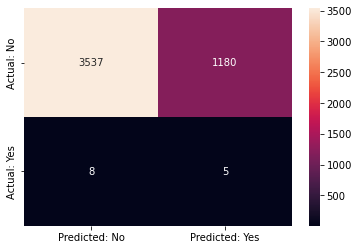

In [392]:
cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

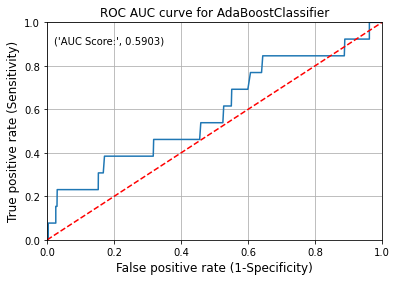

In [393]:
y_pred_proba = ada_model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for AdaBoostClassifier', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,
y_pred_proba),4)))
plt.grid(True)

In [394]:
Performance_report(ada_model, 'AdaBoostClassifier')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219
5,Random Forest Classifier,0.611634,0.117647,0.153846,0.994503,0.130625,0.133333
6,Tuned Random Forest Classifier,0.564480,0.125000,0.153846,0.994715,0.135309,0.137931
7,Basic KNeighborsClassifier,0.520678,0.011628,0.076923,0.979493,0.015501,0.020202
8,Tuned KNeighborsClassifier,0.533162,0.019608,0.076923,0.986892,0.026988,0.031250
9,GaussianNB,0.604222,0.003712,0.615385,0.545032,0.001927,0.007380


In [395]:
Performance_report_train(ada_model, 'AdaBoostClassifier')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685
5,Random Forest Classifier,0.999939,0.998569,0.998675,0.998622,0.997244,0.998622
6,Tuned Random Forest Classifier,0.999846,0.998040,0.998781,0.998410,0.996820,0.998410
7,Basic KNeighborsClassifier,0.995784,0.993041,0.983355,0.988232,0.976464,0.988175
8,Tuned KNeighborsClassifier,0.986456,0.997291,0.975563,0.986456,0.972913,0.986307
9,GaussianNB,0.731758,0.613096,0.727591,0.634217,0.268434,0.665455


### Hyper Parameter Tuning for Ada Boost 

In [396]:
# the cells below were ran in colab and their results are stored since they require a lot of computing power and time

In [397]:
ada_tuned = AdaBoostClassifier(learning_rate=0.15, n_estimators=350)
ada_model_tuned = ada_tuned.fit(X_train_smote, y_train_smote)

In [398]:
y_pred_train = ada_model_tuned.predict(X_train_smote)
y_pred_test = ada_model_tuned.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      4717
           1       0.00      0.38      0.01        13

    accuracy                           0.76      4730
   macro avg       0.50      0.57      0.44      4730
weighted avg       1.00      0.76      0.86      4730



In [399]:
# hyperparameter tuning have not improved the accuracy to a great extent but it has increased a little bit 
# also the best parameters are used for the model

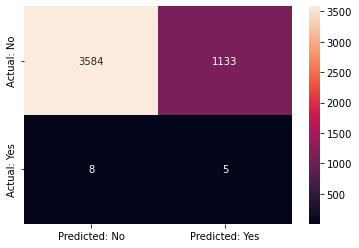

In [400]:
cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

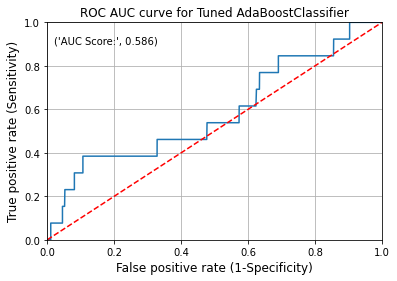

In [401]:
y_pred_proba = ada_model_tuned.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for Tuned AdaBoostClassifier', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,
y_pred_proba),4)))
plt.grid(True)

In [402]:
Performance_report(ada_model_tuned, 'Tuned Ada Boost')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219
5,Random Forest Classifier,0.611634,0.117647,0.153846,0.994503,0.130625,0.133333
6,Tuned Random Forest Classifier,0.564480,0.125000,0.153846,0.994715,0.135309,0.137931
7,Basic KNeighborsClassifier,0.520678,0.011628,0.076923,0.979493,0.015501,0.020202
8,Tuned KNeighborsClassifier,0.533162,0.019608,0.076923,0.986892,0.026988,0.031250
9,GaussianNB,0.604222,0.003712,0.615385,0.545032,0.001927,0.007380


In [403]:
Performance_report_train(ada_model_tuned, 'Tuned Ada Boost')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685
5,Random Forest Classifier,0.999939,0.998569,0.998675,0.998622,0.997244,0.998622
6,Tuned Random Forest Classifier,0.999846,0.998040,0.998781,0.998410,0.996820,0.998410
7,Basic KNeighborsClassifier,0.995784,0.993041,0.983355,0.988232,0.976464,0.988175
8,Tuned KNeighborsClassifier,0.986456,0.997291,0.975563,0.986456,0.972913,0.986307
9,GaussianNB,0.731758,0.613096,0.727591,0.634217,0.268434,0.665455


### 2. Gradient Boosting

In [404]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [405]:
y_pred_train = gboost_model.predict(X_train_smote)
y_pred_test = gboost_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4717
           1       0.15      0.15      0.15        13

    accuracy                           1.00      4730
   macro avg       0.58      0.58      0.58      4730
weighted avg       1.00      1.00      1.00      4730



In [406]:
# Gradient Boosting is giving accuracy of 100% and causing the model to overfit

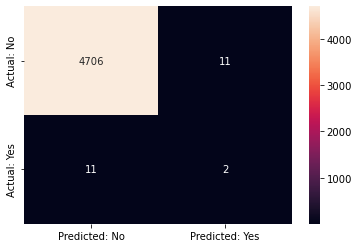

In [407]:
cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

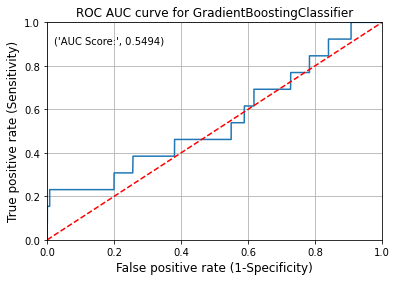

In [408]:
y_pred_proba = gboost_model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for GradientBoostingClassifier', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,
y_pred_proba),4)))
plt.grid(True)

In [409]:
Performance_report(gboost_model, 'GradientBoostingClassifier')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219
5,Random Forest Classifier,0.611634,0.117647,0.153846,0.994503,0.130625,0.133333
6,Tuned Random Forest Classifier,0.564480,0.125000,0.153846,0.994715,0.135309,0.137931
7,Basic KNeighborsClassifier,0.520678,0.011628,0.076923,0.979493,0.015501,0.020202
8,Tuned KNeighborsClassifier,0.533162,0.019608,0.076923,0.986892,0.026988,0.031250
9,GaussianNB,0.604222,0.003712,0.615385,0.545032,0.001927,0.007380


In [410]:
Performance_report_train(gboost_model, 'GradientBoostingClassifier')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685
5,Random Forest Classifier,0.999939,0.998569,0.998675,0.998622,0.997244,0.998622
6,Tuned Random Forest Classifier,0.999846,0.998040,0.998781,0.998410,0.996820,0.998410
7,Basic KNeighborsClassifier,0.995784,0.993041,0.983355,0.988232,0.976464,0.988175
8,Tuned KNeighborsClassifier,0.986456,0.997291,0.975563,0.986456,0.972913,0.986307
9,GaussianNB,0.731758,0.613096,0.727591,0.634217,0.268434,0.665455


### Hyper Parameter Tuning for GradientBoosting

In [411]:
# the cells below were ran in colab and their results are stored since they require a lot of computing power and time

In [412]:
gb_tuned = GradientBoostingClassifier(learning_rate=0.15, n_estimators=300, max_depth=6)
gb_model_tuned = gb_tuned.fit(X_train_smote, y_train_smote)

In [413]:
y_pred_train = gb_model_tuned.predict(X_train_smote)
y_pred_test = gb_model_tuned.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4717
           1       0.22      0.15      0.18        13

    accuracy                           1.00      4730
   macro avg       0.61      0.58      0.59      4730
weighted avg       1.00      1.00      1.00      4730



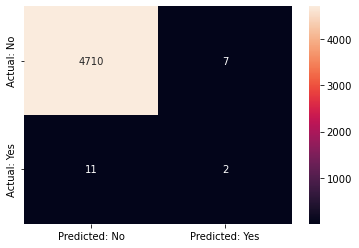

In [414]:
cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

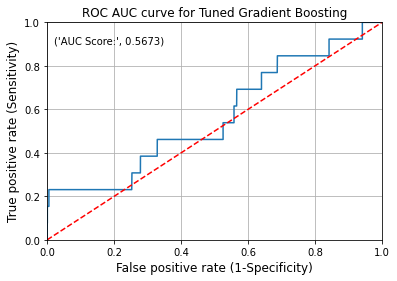

In [415]:
y_pred_proba = gb_model_tuned.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for Tuned Gradient Boosting', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,
y_pred_proba),4)))
plt.grid(True)

In [416]:
Performance_report(gb_model_tuned, 'Tuned GradientBoosting')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219
5,Random Forest Classifier,0.611634,0.117647,0.153846,0.994503,0.130625,0.133333
6,Tuned Random Forest Classifier,0.564480,0.125000,0.153846,0.994715,0.135309,0.137931
7,Basic KNeighborsClassifier,0.520678,0.011628,0.076923,0.979493,0.015501,0.020202
8,Tuned KNeighborsClassifier,0.533162,0.019608,0.076923,0.986892,0.026988,0.031250
9,GaussianNB,0.604222,0.003712,0.615385,0.545032,0.001927,0.007380


In [417]:
Performance_report_train(gb_model_tuned, 'Tuned GradientBoosting')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685
5,Random Forest Classifier,0.999939,0.998569,0.998675,0.998622,0.997244,0.998622
6,Tuned Random Forest Classifier,0.999846,0.998040,0.998781,0.998410,0.996820,0.998410
7,Basic KNeighborsClassifier,0.995784,0.993041,0.983355,0.988232,0.976464,0.988175
8,Tuned KNeighborsClassifier,0.986456,0.997291,0.975563,0.986456,0.972913,0.986307
9,GaussianNB,0.731758,0.613096,0.727591,0.634217,0.268434,0.665455


### 3. XGBoost

In [418]:
from xgboost import XGBClassifier

In [419]:
xgb = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model = xgb.fit(X_train_smote, y_train_smote)

In [420]:
y_pred_train = xgb_model.predict(X_train_smote)
y_pred_test = xgb_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4717
           1       0.17      0.15      0.16        13

    accuracy                           1.00      4730
   macro avg       0.58      0.58      0.58      4730
weighted avg       1.00      1.00      1.00      4730



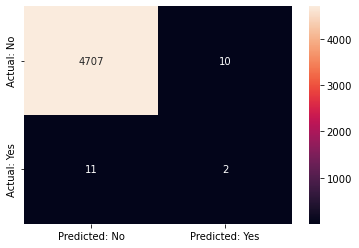

In [421]:
cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

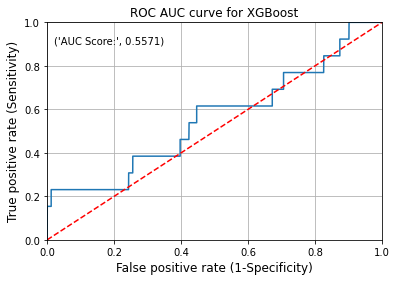

In [422]:
y_pred_proba = xgb_model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for XGBoost', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,
y_pred_proba),4)))
plt.grid(True)

In [423]:
Performance_report(xgb_model, 'XGBClassifier')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219
5,Random Forest Classifier,0.611634,0.117647,0.153846,0.994503,0.130625,0.133333
6,Tuned Random Forest Classifier,0.564480,0.125000,0.153846,0.994715,0.135309,0.137931
7,Basic KNeighborsClassifier,0.520678,0.011628,0.076923,0.979493,0.015501,0.020202
8,Tuned KNeighborsClassifier,0.533162,0.019608,0.076923,0.986892,0.026988,0.031250
9,GaussianNB,0.604222,0.003712,0.615385,0.545032,0.001927,0.007380


In [424]:
Performance_report_train(xgb_model, 'XGBClassifier')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685
5,Random Forest Classifier,0.999939,0.998569,0.998675,0.998622,0.997244,0.998622
6,Tuned Random Forest Classifier,0.999846,0.998040,0.998781,0.998410,0.996820,0.998410
7,Basic KNeighborsClassifier,0.995784,0.993041,0.983355,0.988232,0.976464,0.988175
8,Tuned KNeighborsClassifier,0.986456,0.997291,0.975563,0.986456,0.972913,0.986307
9,GaussianNB,0.731758,0.613096,0.727591,0.634217,0.268434,0.665455


### Hyper Parameter Tuning for XGBoost

In [425]:
# the cells below were ran in colab and their results are stored since they require a lot of computing power and time

In [426]:
xgb_tuned = XGBClassifier(gamma = 0, learning_rate = 0.6, max_depth = 9)
xgb_model_tuned = xgb_tuned.fit(X_train_smote, y_train_smote)

In [427]:
y_pred_train = xgb_model_tuned.predict(X_train_smote)
y_pred_test = xgb_model_tuned.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4717
           1       0.25      0.15      0.19        13

    accuracy                           1.00      4730
   macro avg       0.62      0.58      0.59      4730
weighted avg       1.00      1.00      1.00      4730



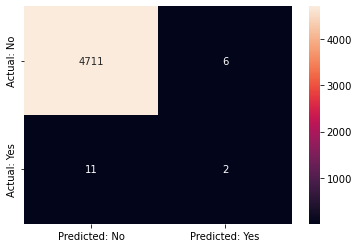

In [428]:
cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

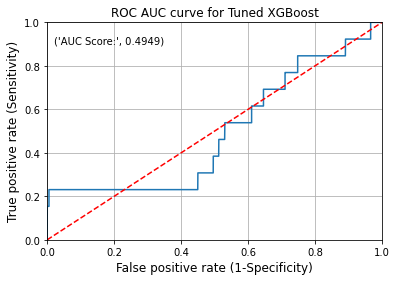

In [429]:
y_pred_proba = xgb_model_tuned.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for Tuned XGBoost', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,
y_pred_proba),4)))
plt.grid(True)

In [430]:
Performance_report(xgb_model_tuned, 'Tuned XGBClassifier')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219
5,Random Forest Classifier,0.611634,0.117647,0.153846,0.994503,0.130625,0.133333
6,Tuned Random Forest Classifier,0.564480,0.125000,0.153846,0.994715,0.135309,0.137931
7,Basic KNeighborsClassifier,0.520678,0.011628,0.076923,0.979493,0.015501,0.020202
8,Tuned KNeighborsClassifier,0.533162,0.019608,0.076923,0.986892,0.026988,0.031250
9,GaussianNB,0.604222,0.003712,0.615385,0.545032,0.001927,0.007380


In [431]:
Performance_report_train(xgb_model_tuned, 'Tuned XGBClassifier')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685
5,Random Forest Classifier,0.999939,0.998569,0.998675,0.998622,0.997244,0.998622
6,Tuned Random Forest Classifier,0.999846,0.998040,0.998781,0.998410,0.996820,0.998410
7,Basic KNeighborsClassifier,0.995784,0.993041,0.983355,0.988232,0.976464,0.988175
8,Tuned KNeighborsClassifier,0.986456,0.997291,0.975563,0.986456,0.972913,0.986307
9,GaussianNB,0.731758,0.613096,0.727591,0.634217,0.268434,0.665455


### 4. LightGBM


In [432]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(X_train_smote, y_train_smote)

In [433]:
y_pred_train = lgbm_model.predict(X_train_smote)
y_pred_test = lgbm_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4717
           1       0.07      0.15      0.09        13

    accuracy                           0.99      4730
   macro avg       0.53      0.57      0.54      4730
weighted avg       1.00      0.99      0.99      4730



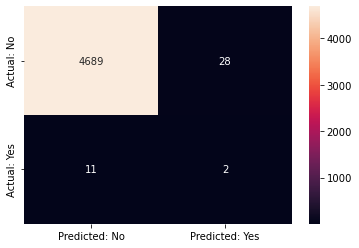

In [434]:
cm=confusion_matrix(y_test,y_pred_test)

conf_mat = pd.DataFrame(data = cm, columns = ['Predicted: No', 'Predicted: Yes'],
                       index = ['Actual: No', 'Actual: Yes'])

sns.heatmap(conf_mat, annot = True, fmt = 'd')
plt.show()

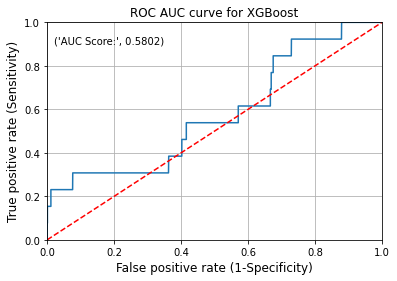

In [435]:
y_pred_proba = lgbm_model.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC curve for XGBoost', fontsize = 12)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test,
y_pred_proba),4)))
plt.grid(True)

In [436]:
Performance_report(lgbm_model, 'LightGBM')
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219
5,Random Forest Classifier,0.611634,0.117647,0.153846,0.994503,0.130625,0.133333
6,Tuned Random Forest Classifier,0.564480,0.125000,0.153846,0.994715,0.135309,0.137931
7,Basic KNeighborsClassifier,0.520678,0.011628,0.076923,0.979493,0.015501,0.020202
8,Tuned KNeighborsClassifier,0.533162,0.019608,0.076923,0.986892,0.026988,0.031250
9,GaussianNB,0.604222,0.003712,0.615385,0.545032,0.001927,0.007380


In [437]:
Performance_report_train(lgbm_model, 'LightGBM')
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685
5,Random Forest Classifier,0.999939,0.998569,0.998675,0.998622,0.997244,0.998622
6,Tuned Random Forest Classifier,0.999846,0.998040,0.998781,0.998410,0.996820,0.998410
7,Basic KNeighborsClassifier,0.995784,0.993041,0.983355,0.988232,0.976464,0.988175
8,Tuned KNeighborsClassifier,0.986456,0.997291,0.975563,0.986456,0.972913,0.986307
9,GaussianNB,0.731758,0.613096,0.727591,0.634217,0.268434,0.665455


In [438]:
# Final model chosen for our data  is Random Forest Classifier with Hyper Parameter tuning
# because it has good results for accuracy as well as the precision, recall and f1-score are somewhat better than other models.
# Random Forest Classifier has following advantages to other models:
## Great with High dimensionality
## Quick Prediction/Training Speed
## Robust to Outliers and Non-linear Data
## Handles Unbalanced Data
## Low Bias, Moderate Variance

### K-Fold Cross Validation Model Selection

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

In [215]:
X_entire = pd.concat([X_train, X_test], axis=0)
X_entire.drop('STATUS',axis=1,inplace=True)
X_entire.shape

(23648, 8)

In [216]:
y_entire = pd.concat([y_train, y_test], axis=0)
y_entire.shape

(23648,)

### CV for Logistic Regression

In [217]:
log_model = LogisticRegression()
cv_scores_log = cross_val_score(estimator=log_model, X=X_entire, y=y_entire, cv = 20, scoring='roc_auc')
cv_scores_log

array([0.27358757, 0.5460452 , 0.81053859, 0.41072943, 0.73812553,
       0.56382528, 0.74067006, 0.41486429, 0.89058524, 0.7192536 ,
       0.74865705, 0.83997738, 0.80067854, 0.72660447, 0.74681934,
       0.74512299, 0.54877014, 0.45575346, 0.78343229, 0.52261804])

In [218]:
cv_scores_log.mean()

0.6513329248189837

### CV for Decision Tree (Tuned)

In [219]:
tree_mod = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split=9)
cv_scores_dt = cross_val_score(estimator=tree_mod, X=X_entire, y=y_entire, cv = 20, scoring='roc_auc')
cv_scores_dt

array([0.29364407, 0.59844633, 0.56859627, 0.66433418, 0.55173876,
       0.57220102, 0.77099237, 0.7841391 , 0.94133446, 0.73593441,
       0.63217416, 0.52530393, 0.21416455, 0.93822448, 0.5421261 ,
       0.61662426, 0.56813684, 0.53873339, 0.78894543, 0.76717557])

In [220]:
cv_scores_dt.mean()

0.6306484835851507

### CV for Random Forest (Tuned)

In [221]:
rf_mod = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=20, max_features='log2', min_samples_split=2)
cv_scores_rf = cross_val_score(estimator=rf_mod, X=X_entire, y=y_entire, cv = 20, scoring='roc_auc')
cv_scores_rf

array([0.46228814, 0.64067797, 0.72752332, 0.60093299, 0.6014631 ,
       0.72688719, 0.59944869, 0.60029686, 0.9977382 , 0.799689  ,
       0.81467345, 0.46437659, 0.46013571, 0.99830365, 0.64447272,
       0.63867684, 0.63895957, 0.6392423 , 0.6403732 , 0.63980775])

In [222]:
cv_scores_rf.mean()

0.6667983616298404

### CV for Naive Bayes

In [223]:
gnb = GaussianNB()
cv_scores_nb = cross_val_score(estimator=gnb, X=X_entire, y=y_entire, cv = 20, scoring='roc_auc')
cv_scores_nb

array([0.2670904 , 0.5039548 , 0.78784987, 0.44868533, 0.72094996,
       0.56997455, 0.68129771, 0.53912214, 0.83234379, 0.79106588,
       0.7636415 , 0.57054001, 0.7325417 , 0.68108567, 0.88196211,
       0.70356234, 0.55442465, 0.33220243, 0.71755725, 0.61224201])

In [224]:
cv_scores_nb.mean()

0.6346047054623519

### CV for AdaBoost (Tuned)

In [225]:
ada_model = AdaBoostClassifier(learning_rate=0.15, n_estimators=350)
cv_scores_ada = cross_val_score(estimator=ada_model, X=X_entire, y=y_entire, cv = 20, scoring='roc_auc')
cv_scores_ada

array([0.30240113, 0.5940678 , 0.58449958, 0.39079729, 0.66603053,
       0.6375106 , 0.57082273, 0.57580577, 0.97766469, 0.87814532,
       0.86513995, 0.49929319, 0.79205541, 0.81000848, 0.86499859,
       0.6836302 , 0.59640939, 0.45547074, 0.87701442, 0.61860334])

In [226]:
cv_scores_ada.mean()

0.6620184562230753

### CV for Gradient Boosting (Tuned)

In [227]:
gb_model = GradientBoostingClassifier(learning_rate=0.15, n_estimators=300, max_depth=6)
cv_scores_gb = cross_val_score(estimator=gb_model, X=X_entire, y=y_entire, cv = 20, scoring='roc_auc')
cv_scores_gb

array([0.45127119, 0.57824859, 0.42111959, 0.45165394, 0.56806616,
       0.5610687 , 0.56509754, 0.45260814, 0.99802092, 0.65507492,
       0.70893412, 0.50636132, 0.62991236, 0.99717275, 0.3634436 ,
       0.57944586, 0.64178682, 0.55668646, 0.58340401, 0.85877863])

In [228]:
cv_scores_gb.mean()

0.6064077811800672

### CV for XGBoost (Tuned)

In [230]:
xgb_model = XGBClassifier(gamma = 0, learning_rate = 0.6, max_depth = 9, disable_default_eval_metric=1)
cv_scores_xgb = cross_val_score(estimator=xgb_model, X=X_entire, y=y_entire, cv = 20, scoring='roc_auc')
cv_scores_xgb

array([0.37867232, 0.65451977, 0.69455047, 0.66518236, 0.90733673,
       0.74618321, 0.53329092, 0.79166667, 0.99915182, 0.81849025,
       0.96098388, 0.6270851 , 0.50268589, 0.9988691 , 0.62750919,
       0.75756291, 0.66808029, 0.70709641, 0.66242578, 0.5910376 ])

In [231]:
cv_scores_xgb.mean()

0.7146190334143173

In [232]:
cv_scores_table = pd.DataFrame([cv_scores_log, cv_scores_dt, cv_scores_rf, cv_scores_nb, cv_scores_xgb, cv_scores_ada, cv_scores_gb],
                               index = ['Logistic_Regression', 'Decision_tree', 'Random_forest', 'Naive_bayes', 'XGBoost', 'AdaBoost', 'GradientBoost'])
cv_scores_table = cv_scores_table.T

In [233]:
cv_scores_table

,Logistic_Regression,Decision_tree,Random_forest,Naive_bayes,XGBoost,AdaBoost,GradientBoost
0,0.273588,0.293644,0.462288,0.267090,0.378672,0.302401,0.451271
1,0.546045,0.598446,0.640678,0.503955,0.654520,0.594068,0.578249
2,0.810539,0.568596,0.727523,0.787850,0.694550,0.584500,0.421120
3,0.410729,0.664334,0.600933,0.448685,0.665182,0.390797,0.451654
4,0.738126,0.551739,0.601463,0.720950,0.907337,0.666031,0.568066
5,0.563825,0.572201,0.726887,0.569975,0.746183,0.637511,0.561069
6,0.740670,0.770992,0.599449,0.681298,0.533291,0.570823,0.565098
7,0.414864,0.784139,0.600297,0.539122,0.791667,0.575806,0.452608
8,0.890585,0.941334,0.997738,0.832344,0.999152,0.977665,0.998021
9,0.719254,0.735934,0.799689,0.791066,0.818490,0.878145,0.655075


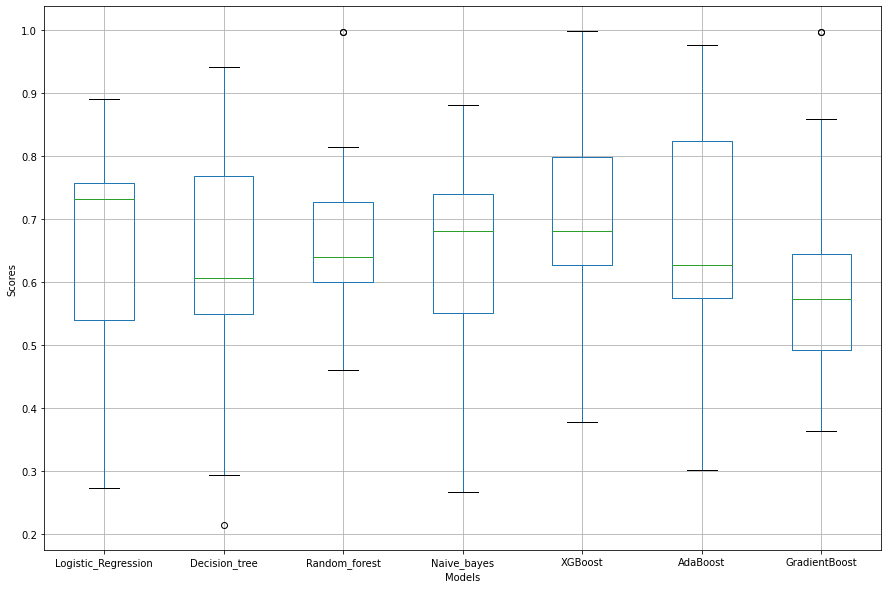

In [243]:
plt.figure(figsize=(15, 10))
cv_scores_table.boxplot()
plt.xlabel('Models')
plt.ylabel('Scores')
plt.show()

In [244]:
# We can observe from the CrossVal scores the spread of scores of Random_forest model is very small
# and also it has low variance compared to the other models.

In [440]:
report_card

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.605461,0.003421,0.461538,0.628964,0.001342,0.006791
3,Decision Tree Classifier,0.609351,0.066667,0.153846,0.991755,0.089532,0.093023
4,Tuned Decision Tree Classifier,0.524510,0.002632,0.307692,0.677590,-0.000233,0.005219
5,Random Forest Classifier,0.611634,0.117647,0.153846,0.994503,0.130625,0.133333
6,Tuned Random Forest Classifier,0.564480,0.125000,0.153846,0.994715,0.135309,0.137931
7,Basic KNeighborsClassifier,0.520678,0.011628,0.076923,0.979493,0.015501,0.020202
8,Tuned KNeighborsClassifier,0.533162,0.019608,0.076923,0.986892,0.026988,0.031250
9,GaussianNB,0.604222,0.003712,0.615385,0.545032,0.001927,0.007380


In [460]:
report_card_train

,Model Name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Basic Logistic Regression Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression Model with SMOTE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression Model without correlated c...,0.729691,0.661622,0.723032,0.676623,0.353247,0.690965
3,Decision Tree Classifier,0.999980,0.998675,0.998569,0.998622,0.997244,0.998622
4,Tuned Decision Tree Classifier,0.923956,0.761099,0.982348,0.837000,0.673999,0.857685
5,Random Forest Classifier,0.999939,0.998569,0.998675,0.998622,0.997244,0.998622
6,Tuned Random Forest Classifier,0.999846,0.998040,0.998781,0.998410,0.996820,0.998410
7,Basic KNeighborsClassifier,0.995784,0.993041,0.983355,0.988232,0.976464,0.988175
8,Tuned KNeighborsClassifier,0.986456,0.997291,0.975563,0.986456,0.972913,0.986307
9,GaussianNB,0.731758,0.613096,0.727591,0.634217,0.268434,0.665455
